# Introduction

This notebook builds on the first 4 notebooks in this series. In the first 3 notebooks, we created a framework for simulating polymer adsorption. Notebook 4 demonstrated a streamlined approach with minimal code in the notebook (mostly moved to a *.py file), reflecting a "mature" simulation codebase.<br><br>Equally important is visualization and quantitative analysis of the simulation results. In the previous notebooks, we stored those results to disk using the pickle library. Here, we will procedurally unpickle those simulation results and generate a variety of visualizations.

## Notes on matplotlib, the mandatory scourge of scientific Python. 

Although python for data analysis - once mastered - is massively more powerful than legacy data analysis approaches like Excel spreadsheets and Igor Pro, one area that it has yet to match these legacy applications is in <u>plotting</u>.<br><br> The reason is simple: python is interpreted code and therefore has no intrinsic "clickable" graphical user interface (GUI) for selecting and adjusting plot elements. And, when you think about it, there are a <i>lot</i> of plot elements including axes, axis labels, scale style and limits, fonts, colors of every element, etc, etc. Because it lacks a GUI, python also doesn't intrinsically have a "what you see is what you get" (WYSIWYG) capability where your changes are reflected in what you see in real time. You must run the code and see how your changes are reflected.<br><br> These two issues - the complexity of plotting with its endless variety and tailorable elements, and the lack of a GUI in python - make <i>any</i> exercise in plotting in python, regardless of the library, somewhat intrinsically frustrating (or <i>slow</i>, particularly once you get addicted to the speed that python brings in other areas of computation).<br><br>And that brings us to Python plotting libraries. The most commonly encountered plotting library in Python is matplotlib. This library is a swiss army knife for plotting - it contains code to achieve almost any data representation you can conceive of. The need for plotting has been around since the earliest beginnings of scientific Python, and matplotlib was there since the early days. As a result, matplotlib library has evolved and sprawled into a massive ecosystem. Although the authors strive for consistency, sometimes you'll encounter different syntax to achieve similar changes in different parts of that ecosystem. You'll frequently see deprecation warnings in new versions of matplotlib, where the authors are tweaking older parts of the ecosystem to modernize and homogenize the interface. matplotlib integration is also built into data science tools like pandas and xarray - it's essentially unavoidable.<br><br>There are newer plotting libraries that are more consistent, lighter weight, and significantly faster than matplotlib, including hvplot, plotly, and bokeh. There are also attempts to make matplotlib easier to use and better-looking like seaborn. Although we use matplotlib here, these alternatives could instead be used in a similar framework.<br><br>Regardless of the library, plotting code tends to be bulky, with many lines, most of which tweak various elements of what is shown. Most of these code lines are fairly self-explanatory, so this notebook will include somewhat less line-by-line explanatory text.<br><br>Finally, it should be said that although plotting in Python is frustrating, it has several key strengths that legacy approaches lack. Once the preferred format and look are achieved, it can instantly be re-created for a new set of data since everything is just code. "Smart" code can be written to adjust how things are shown based on what the data looks like. These themes will be evident in this notebook.  

In [1]:
import sys
from pathlib import Path

In [2]:
# set some paths. These will be relative to the current working directory, which is the same directory this notebook is in
picklePath = Path.cwd() / "pickles"
videoPath = Path.cwd() / "videos"

# Import pickles

## pickles function

We will start right away with a function since the user is already familiar with them. Below we define a function to import the pickes in the pickle directory that match a certain string + a wildcard. The data will be stored in a "results" list.

In [3]:
# a function to import the pickles
#pickle library
import pickle
#lzma compression library required for the decompression
import lzma
#this is a popular module for working with files in python
import glob
#tqdm provides a progress bar
from tqdm import tqdm
#pprint is a pretty printer
from pprint import pprint

def import_pickles(picklePath, sstring):
    # below is a "docstring" and it is used to describe the function
    """
    Imports pickle files from a specified directory that match a given string.

    Parameters:
        picklePath (str): The path to the directory containing the pickle files.
        sstring (str): The string that the file names must contain.

    Returns:
        list: A list of objects representing the loaded pickle data.
    """
    # initialize an empty list to store the results
    results = []
    # use glob to find all the files in the directory that match the string
    # note the wildcard "*" in the glob function
    file_list = glob.glob(f"{picklePath}/{sstring}*")
    # show us those filenames
    pprint(file_list)
    # sort them - this will put them in the order they were created
    file_list.sort()
    # loop through the files. Notice how tqdm works - it actually is a function around the list that is iterated through
    for file_name in tqdm(file_list, colour = "blue"):
        # open the file using lzma
        with lzma.open(file_name, "rb") as pickle_file:
            # load the pickle file and append it to the results list
            results.append(pickle.load(pickle_file))
    # return the whole results list
    return results

## Importing the results from pickles from our earlier tutorial

In [4]:
# run this function on an example dataset:
results = import_pickles(picklePath, "tutorial_tanlat_radius_nm")

['/homes/deand/polymer_adsorption_on_sphere/pickles/tutorial_tanlat_radius_nm_00.pkl',
 '/homes/deand/polymer_adsorption_on_sphere/pickles/tutorial_tanlat_radius_nm_01.pkl',
 '/homes/deand/polymer_adsorption_on_sphere/pickles/tutorial_tanlat_radius_nm_02.pkl',
 '/homes/deand/polymer_adsorption_on_sphere/pickles/tutorial_tanlat_radius_nm_03.pkl',
 '/homes/deand/polymer_adsorption_on_sphere/pickles/tutorial_tanlat_radius_nm_04.pkl',
 '/homes/deand/polymer_adsorption_on_sphere/pickles/tutorial_tanlat_radius_nm_05.pkl',
 '/homes/deand/polymer_adsorption_on_sphere/pickles/tutorial_tanlat_radius_nm_06.pkl',
 '/homes/deand/polymer_adsorption_on_sphere/pickles/tutorial_tanlat_radius_nm_07.pkl',
 '/homes/deand/polymer_adsorption_on_sphere/pickles/tutorial_tanlat_radius_nm_08.pkl',
 '/homes/deand/polymer_adsorption_on_sphere/pickles/tutorial_tanlat_radius_nm_09.pkl',
 '/homes/deand/polymer_adsorption_on_sphere/pickles/tutorial_tanlat_radius_nm_10.pkl',
 '/homes/deand/polymer_adsorption_on_sphere

 31%|███▏      | 5/16 [00:00<00:01,  7.62it/s]

CyRSoXS
Size of Real               : 4
Maximum Number Of Material : 32
 __________________________________________________________________________________________________
|                                 Thanks for using CyRSoXS                                        |
|--------------------------------------------------------------------------------------------------|
|  Copyright          : Iowa State University                                                      |
|  License            : NIST                                                                       |
|  Acknowledgement    : ONR MURI                                                                   |
|                                                                                                  |
|  Developed at Iowa State University in collaboration with NIST                                   |
|                                                                                                  |
|  Please cite the fol

100%|██████████| 16/16 [00:01<00:00, 13.75it/s]


## Inspecting the imported results

In [5]:
# results is a list of objects 16 elements long. Let's look at the first one
results[0]

{'I': <xarray.DataArray (energy: 104, q: 725)> Size: 302kB
 array([[2.8838021e+10, 1.2997427e+09, 2.3298062e+03, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [1.7574136e+10, 7.9207610e+08, 2.5978555e+03, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [9.1019008e+09, 4.1022886e+08, 2.8981348e+03, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        ...,
        [1.5411133e+11, 6.9458499e+09, 1.4540148e+03, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [1.5565088e+11, 7.0152499e+09, 1.3656537e+03, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [1.5434488e+11, 6.9563484e+09, 1.2919193e+03, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00]], dtype=float32)
 Coordinates:
   * q        (q) float64 6kB 0.0 0.01227 0.02455 0.03682 ... 8.861 8.873 8.886
   * energy   (energy) float64 832B 260.0 270.0 275.0 276.0 ... 302.0 303.0 304.0,
 'A': <xarray.DataArray (energy: 104, q: 725)> Size

## Plotting the imported results

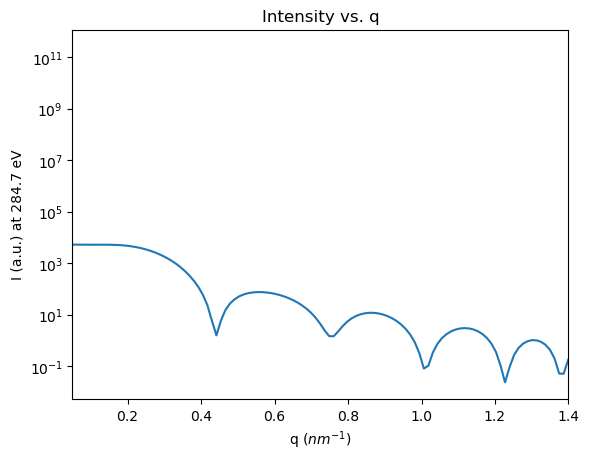

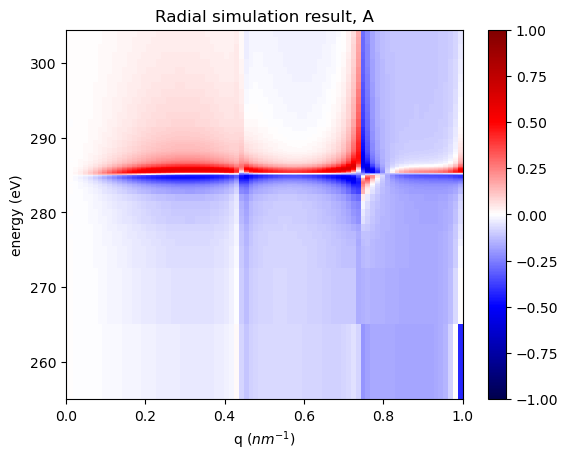

In [6]:
# We can see above that the results dictionary that we stored back in sheet 3 has all the results from the simulation
# let's visualize a couple. Note how the indexing is done here - the first index identifies which simulation, and the second identifies the key for its result dictionary
import matplotlib.pyplot as plt
results[0]["I"].sel(energy = 284.7, method = 'nearest').plot(yscale = "log", xlim = (0.05, 1.4))
plt.title(f"Intensity vs. q")
plt.xlabel("q ($nm^{-1}$)")
plt.ylabel("I (a.u.) at 284.7 eV")
plt.show()
plt.close()
results[0]["A"].plot(xlim=(0,1.0), vmin = -1, vmax = 1, cmap = 'seismic')
plt.title(f"Radial simulation result, A")
plt.xlabel("q ($nm^{-1}$)")
plt.ylabel("energy (eV)")
plt.show()
plt.close()


Everything looks pretty much as we remember!

Now let's compare results across the simulation sweep rather than looking at a single one. The code below will plot I vs. q for each sweep in the simulation.

## Plots to compare data across several simulations

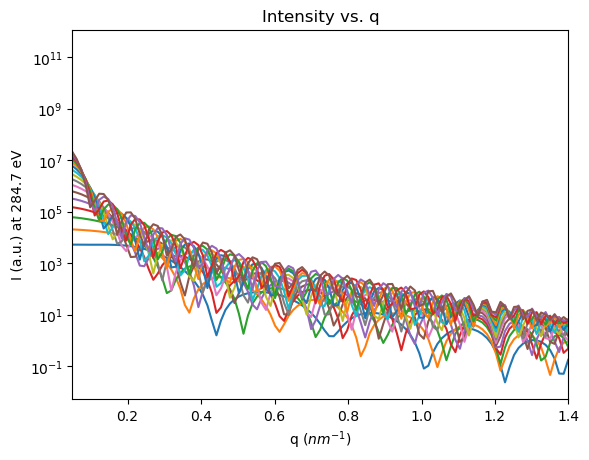

In [7]:
for result in results:
    #note now that the [0] index is removed. That's because result will be a single entry from results due to the list above
    result["I"].sel(energy = 284.7, method = 'nearest').plot(yscale = "log", xlim = (0.05, 1.4))
plt.title(f"Intensity vs. q")
plt.xlabel("q ($nm^{-1}$)")
plt.ylabel("I (a.u.) at 284.7 eV")
plt.show()
plt.close()

This shows how I vs. q changes as we change the radius of the particle in nanometers. It is, frankly, a mess to look at. And that's typical, because so much information is being shown here. We haven't even gotten to A vs. q, energy! For this reason, my preference is to view the effects of parameter sweeps using a video that sweeps back-and-forth across the parameter sweep. It requires a bit more code, but the results are much more digestible.<br><br>Our first step here will be to make a plot that is a ~comprehensive visual abstract of the simulation. We will combine elements of the model visualizations that were stored as well as the simulation results.

## A visual abstract of a single simulation

/tmp/ipykernel_4192049/3521328361.py:36: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0:1, 0:1])


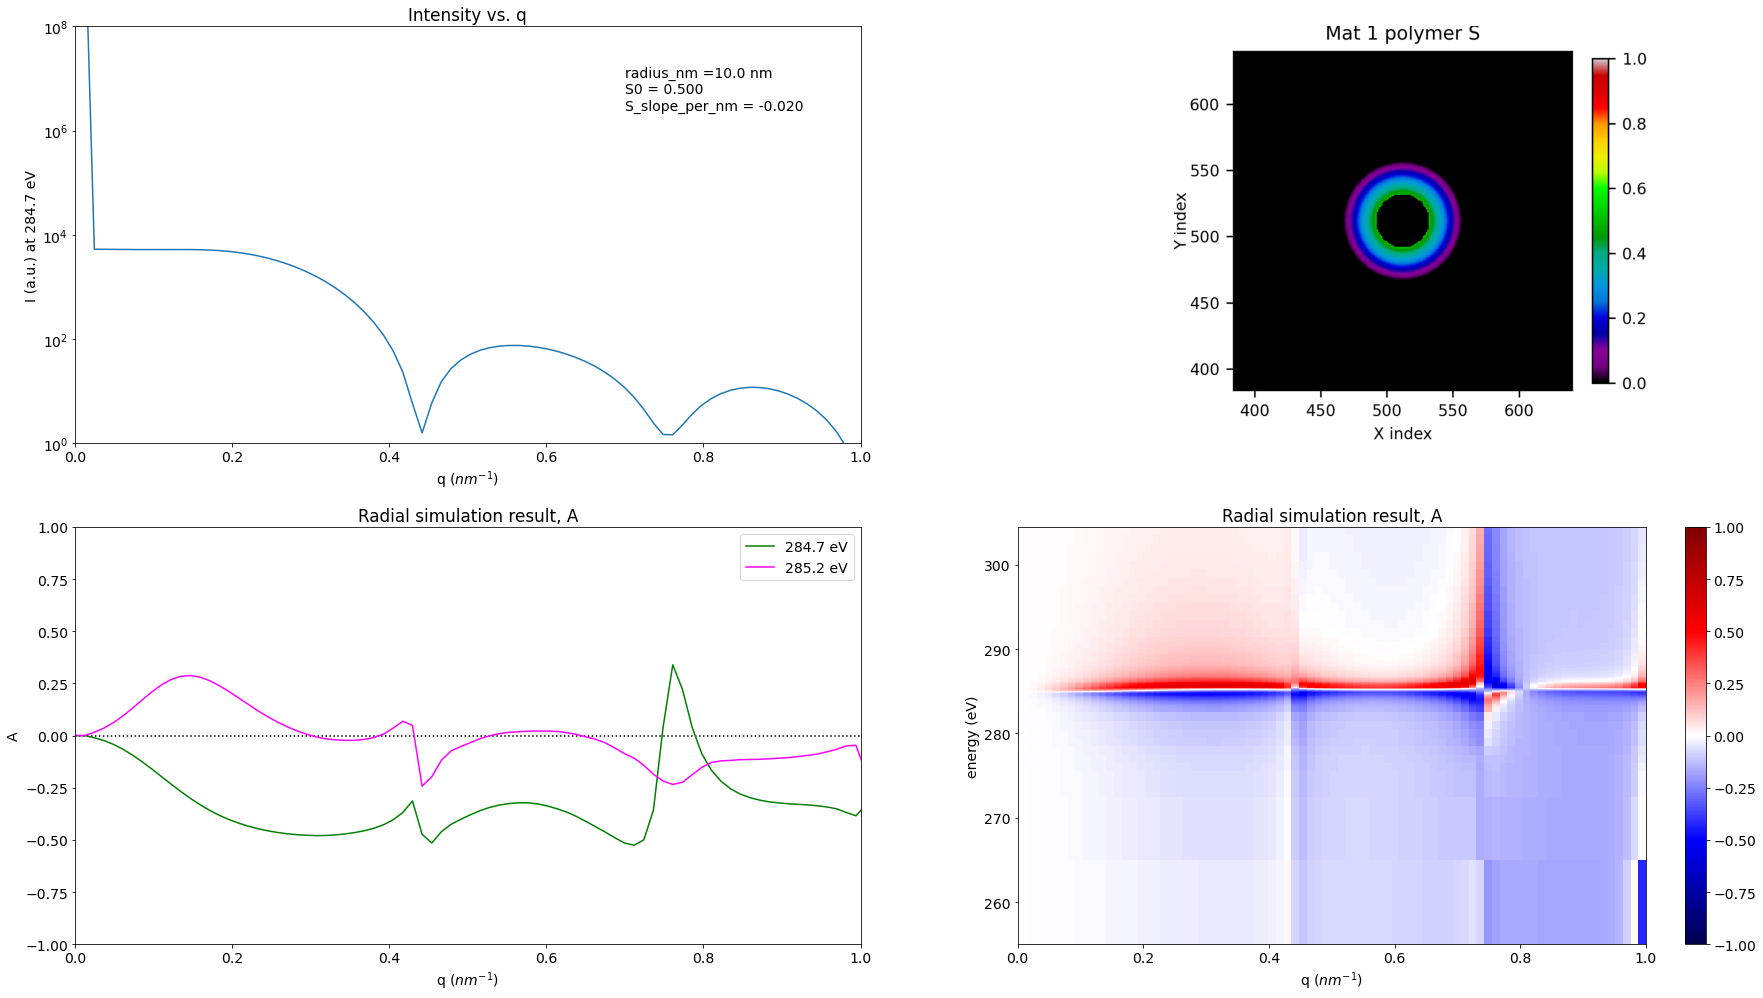

In [20]:
# this next cell will be LONG, but when plotting, it is better to have it all in the same cell, 
# because matplotlib will automatically show the plot when the cell is executed and then close it

# these are some useful libraries for matplotlib
# colormaps allows you to acess the color maps in matplotlib
# gridspec allows you to specify complex layouts of subplots

from matplotlib import colormaps, gridspec, rc
# we will actually need numpy briefly below
import numpy as np

# set font size
rc('font', size=14)

dpi = 72
# we are going to make this visual abstract true HD resolution (1920x1080)
h_size = 1920 / dpi
v_size = 1080 / dpi

fig = plt.subplots(figsize=(h_size, v_size), dpi=dpi)

gs = gridspec.GridSpec(
    # we are shooting for 4 panels; two across and two down
    nrows=2,
    ncols=2,
    figure=fig,
    width_ratios=[1.0, 1.0],
    height_ratios=[1.0, 1.0],
    wspace=0.2,
    hspace=0.2,
)

# our sub-panels will be addressed using matplotlib "axes"
# the gridspec here is feeding the axes their locations by index
#top left, top right, bottom left, bottom right
ax1 = plt.subplot(gs[0:1, 0:1])
ax2 = plt.subplot(gs[0:1, 1:2])
ax3 = plt.subplot(gs[1:2, 0:1])
ax4 = plt.subplot(gs[1:2, 1:2])

# define q limit that we will use to plot the results
# we don't see much practical RSoXS past q ~ 1 nm^-1
qmax = 1

# for just results[0], the first simulation in that series, let's plot I vs. q in the upper left:
# we tell it to plot there by ax = ax1

results[0]["I"].sel(energy = 284.7, method = 'nearest').plot(ax = ax1, yscale = "log", xlim = (0.05, 1.4))
# notice that the below "ax" commands are different than when using "plt". 
# plt.title vs. ax.set_title
# it's one of those matplotlib inconsistencies
ax1.set_title(f"Intensity vs. q")
ax1.set_ylim(top = 1E8, bottom = 1)
ax1.set_xlim(left = 0, right = qmax)
ax1.set_xlabel("q ($nm^{-1}$)")
ax1.set_ylabel("I (a.u.) at 284.7 eV")

# # There's a fair amount of white space on the I vs q plot, so we can put an annotation here describing the args used to run the simulation
annotation = f"radius_nm = " + "{:0.1f}".format(results[0]['args']["radius_nm"]) + " nm\n"
annotation += f"S0 = " + "{:0.3f}".format(results[0]['args']["S0"]) + "\n"
annotation += f"S_slope_per_nm = " + "{:0.3f}".format(results[0]['args']["S_slope_per_nm"])
ax1.annotate(annotation, xy = (0.7, 0.8), xycoords = "axes fraction")

# in top right, let's show the S-field visualization
# this connects the visual abstract to the rigorous NRSS visualizer, guaranteeing a faithful report on the model
ax2.imshow(results[0]["visualizations"][1])
# this below just removes the box and axes around the image so it's clean
ax2.axis("off")


# in bottom left, let's show line traces of A at some specific energies:
# we tell it to plot there by ax = ax3
#let's first plot a dotted line to indicate A = 0
ax3.axhline(y = 0, color = "black", linestyle = "dotted") 
# now we plot the line traces for the different energies
results[0]["A"].sel(energy = 284.7, method = 'nearest').plot(ax = ax3, ylim = (-1, 1), color = "green", label = "284.7 eV")
results[0]["A"].sel(energy = 285.2, method = 'nearest').plot(ax = ax3, ylim = (-1, 1), color = "magenta", label = "285.2 eV")

ax3.set_xlim(left = 0, right = qmax)
ax3.set_title(f"Radial simulation result, A")
ax3.set_xlabel("q ($nm^{-1}$)")
ax3.set_ylabel("A")
ax3.legend()

# let's plot A in the bottom right:
# we tell it to plot there by ax = ax4
results[0]["A"].plot(xlim=(0,1.0), vmin = -1, vmax = 1, cmap = 'seismic', ax = ax4)
ax4.set_xlim(left = 0, right = qmax)
ax4.set_title(f"Radial simulation result, A")
ax4.set_xlabel("q ($nm^{-1}$)")
ax4.set_ylabel("energy (eV)")

# the below lines are some deep matplotlib juju to transfer the figure to an rgb array - this makes it portable to the next step
plt.subplots_adjust(left=0.05, bottom=0.10, right=0.95, top=0.95, wspace=0, hspace=0)
fig[0].canvas.draw()
width, height = fig[0].canvas.get_width_height()
data = np.frombuffer(fig[0].canvas.tostring_rgb(), dtype=np.uint8)
rgb_array = data.reshape(height, width, 3)


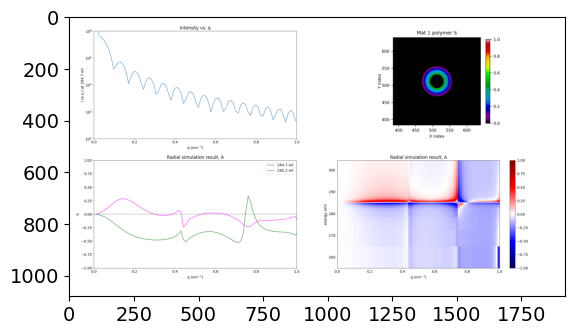

In [73]:

# the beauty of the figure as an rgbarray is that it is portable to other image formats and completely disconnected from matplotlib
plt.imshow(rgb_array)

## Visual abstracts across the sweep of simulations

The easiest way to make the same plot format for each simulation is to write a function to generate the plot and output the visual abstract. We'll use all the same code above but in function form.

In [25]:
from matplotlib import colormaps, gridspec, rc
import numpy as np
def plot_result(result):
    rc('font', size=14)

    dpi = 72
    h_size = 1920 / dpi
    v_size = 1080 / dpi

    fig = plt.subplots(figsize=(h_size, v_size), dpi=dpi)

    gs = gridspec.GridSpec(
        nrows=2,
        ncols=2,
        figure=fig,
        width_ratios=[1.0, 1.0],
        height_ratios=[1.0, 1.0],
        wspace=0.2,
        hspace=0.2,
    )

    ax1 = plt.subplot(gs[0:1, 0:1])
    ax2 = plt.subplot(gs[0:1, 1:2])
    ax3 = plt.subplot(gs[1:2, 0:1])
    ax4 = plt.subplot(gs[1:2, 1:2])

    qmax = 1
    
    result["I"].sel(energy = 284.7, method = 'nearest').plot(ax = ax1, yscale = "log", xlim = (0.05, 1.4))

    ax1.set_title(f"Intensity vs. q")
    ax1.set_ylim(top = 1E8, bottom = 1)
    ax1.set_xlim(left = 0, right = qmax)
    ax1.set_xlabel("q ($nm^{-1}$)")
    ax1.set_ylabel("I (a.u.) at 284.7 eV")

    annotation = f"radius_nm = " + "{:0.1f}".format(result['args']["radius_nm"]) + " nm\n"
    annotation += f"S0 = " + "{:0.3f}".format(result['args']["S0"]) + "\n"
    annotation += f"S_slope_per_nm = " + "{:0.3f}".format(result['args']["S_slope_per_nm"])
    ax1.annotate(annotation, xy = (0.7, 0.8), xycoords = "axes fraction")

    ax2.imshow(result["visualizations"][1])
    ax2.axis("off")

    ax3.axhline(y = 0, color = "black", linestyle = "dotted") 
    result["A"].sel(energy = 284.7, method = 'nearest').plot(ax = ax3, ylim = (-1, 1), color = "green", label = "284.7 eV")
    result["A"].sel(energy = 285.2, method = 'nearest').plot(ax = ax3, ylim = (-1, 1), color = "magenta", label = "285.2 eV")
    ax3.set_xlim(left = 0, right = qmax)
    ax3.set_title(f"Radial simulation result, A")
    ax3.set_xlabel("q ($nm^{-1}$)")
    ax3.set_ylabel("A")
    ax3.legend()

    result["A"].plot(xlim=(0,1.0), vmin = -1, vmax = 1, cmap = 'seismic', ax = ax4)
    ax4.set_xlim(left = 0, right = qmax)
    ax4.set_title(f"Radial simulation result, A")
    ax4.set_xlabel("q ($nm^{-1}$)")
    ax4.set_ylabel("energy (eV)")

    plt.subplots_adjust(left=0.05, bottom=0.10, right=0.95, top=0.95, wspace=0, hspace=0)
    fig[0].canvas.draw()
    width, height = fig[0].canvas.get_width_height()
    data = np.frombuffer(fig[0].canvas.tostring_rgb(), dtype=np.uint8)
    rgb_array = data.reshape(height, width, 3)
    return rgb_array

We will now run this across all the results in the sweep, and store the rgb_array of the visual abstracts in a list

/tmp/ipykernel_4192049/52257544.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0:1, 0:1])


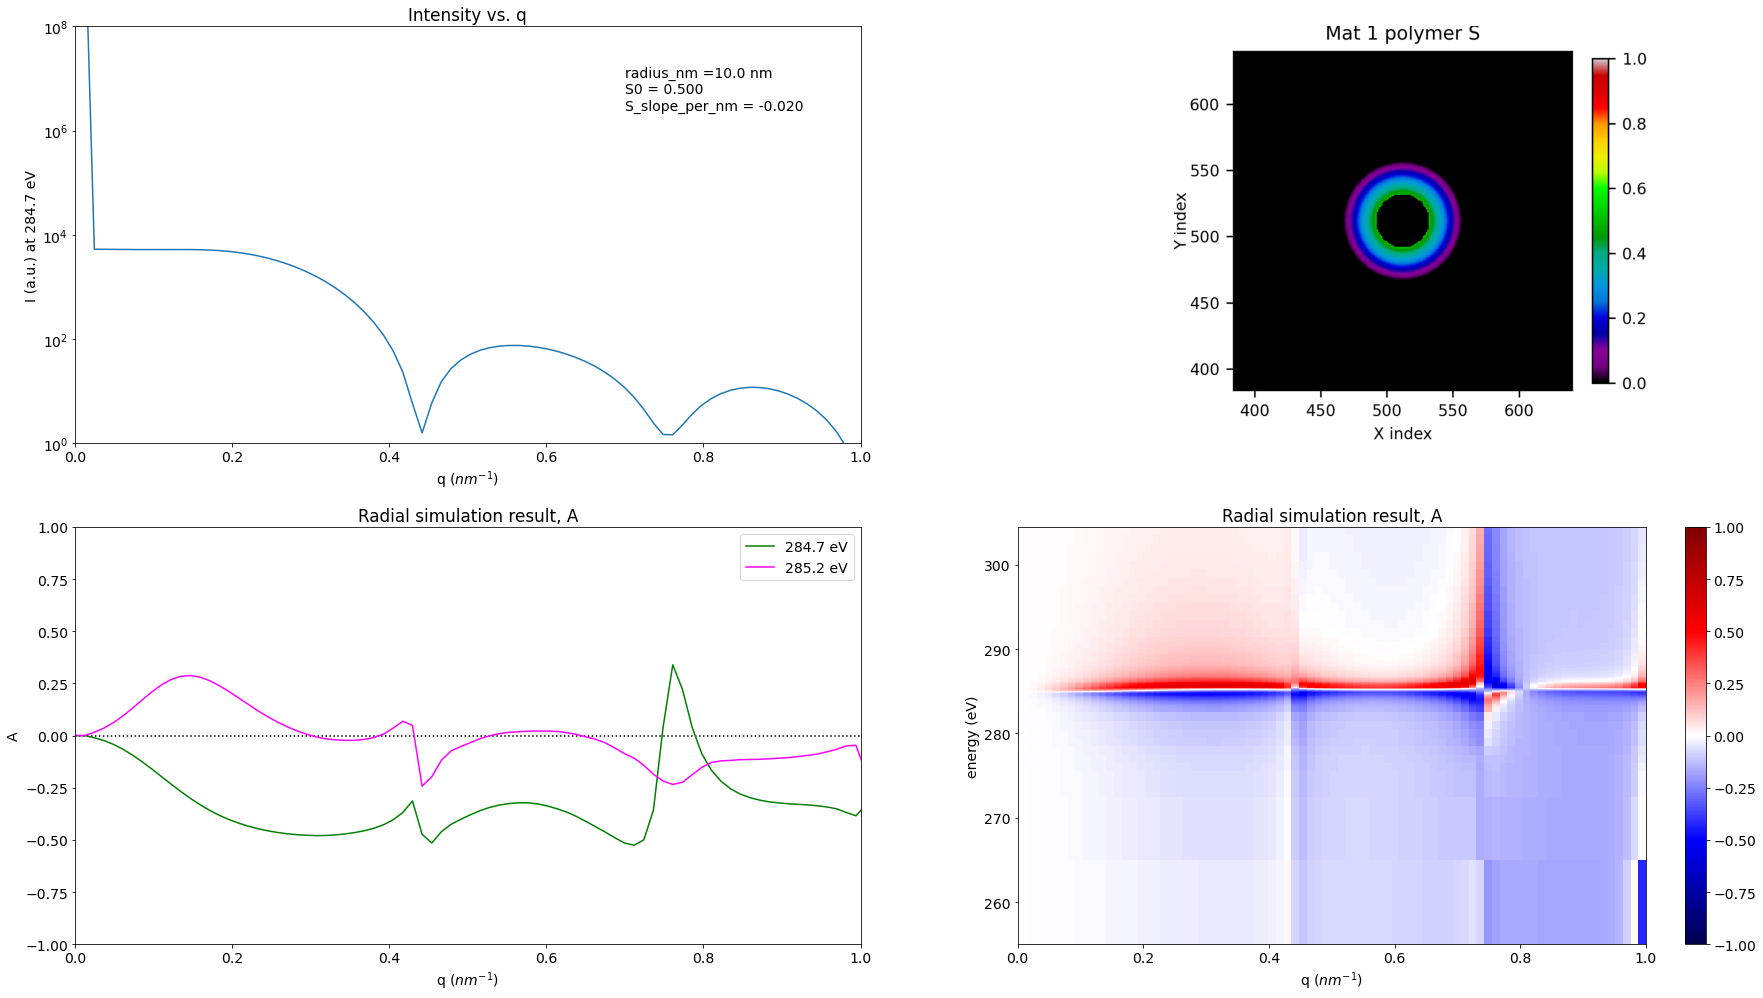

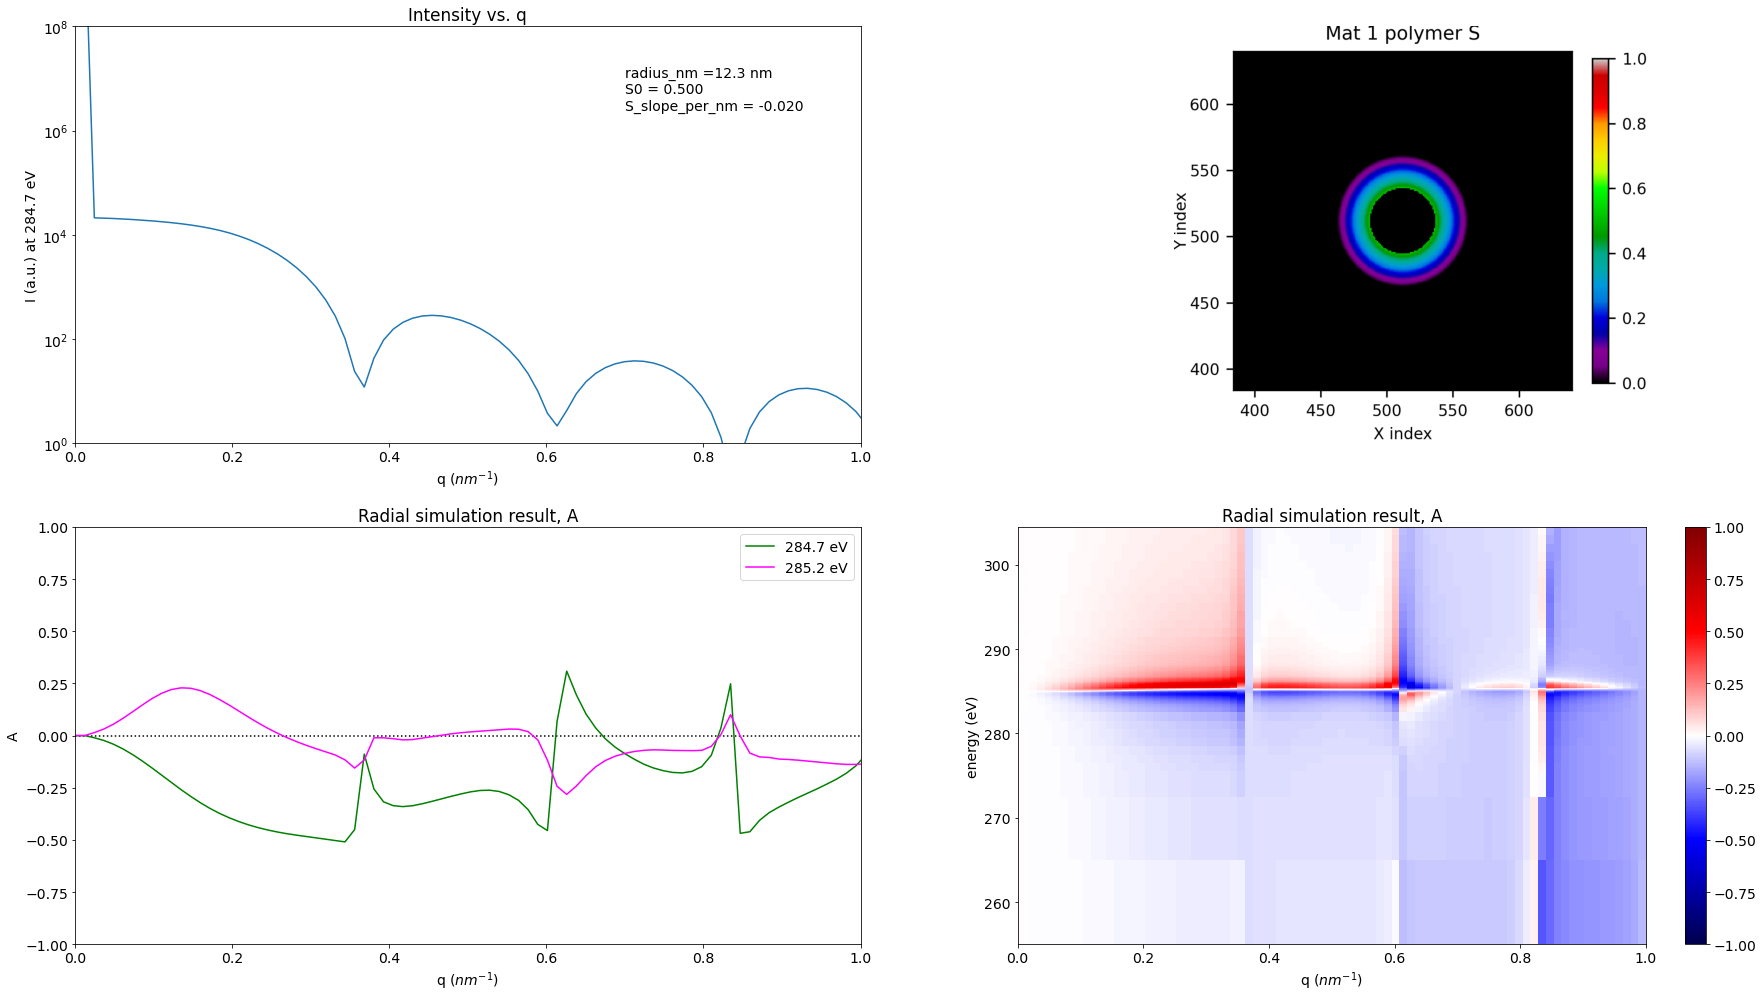

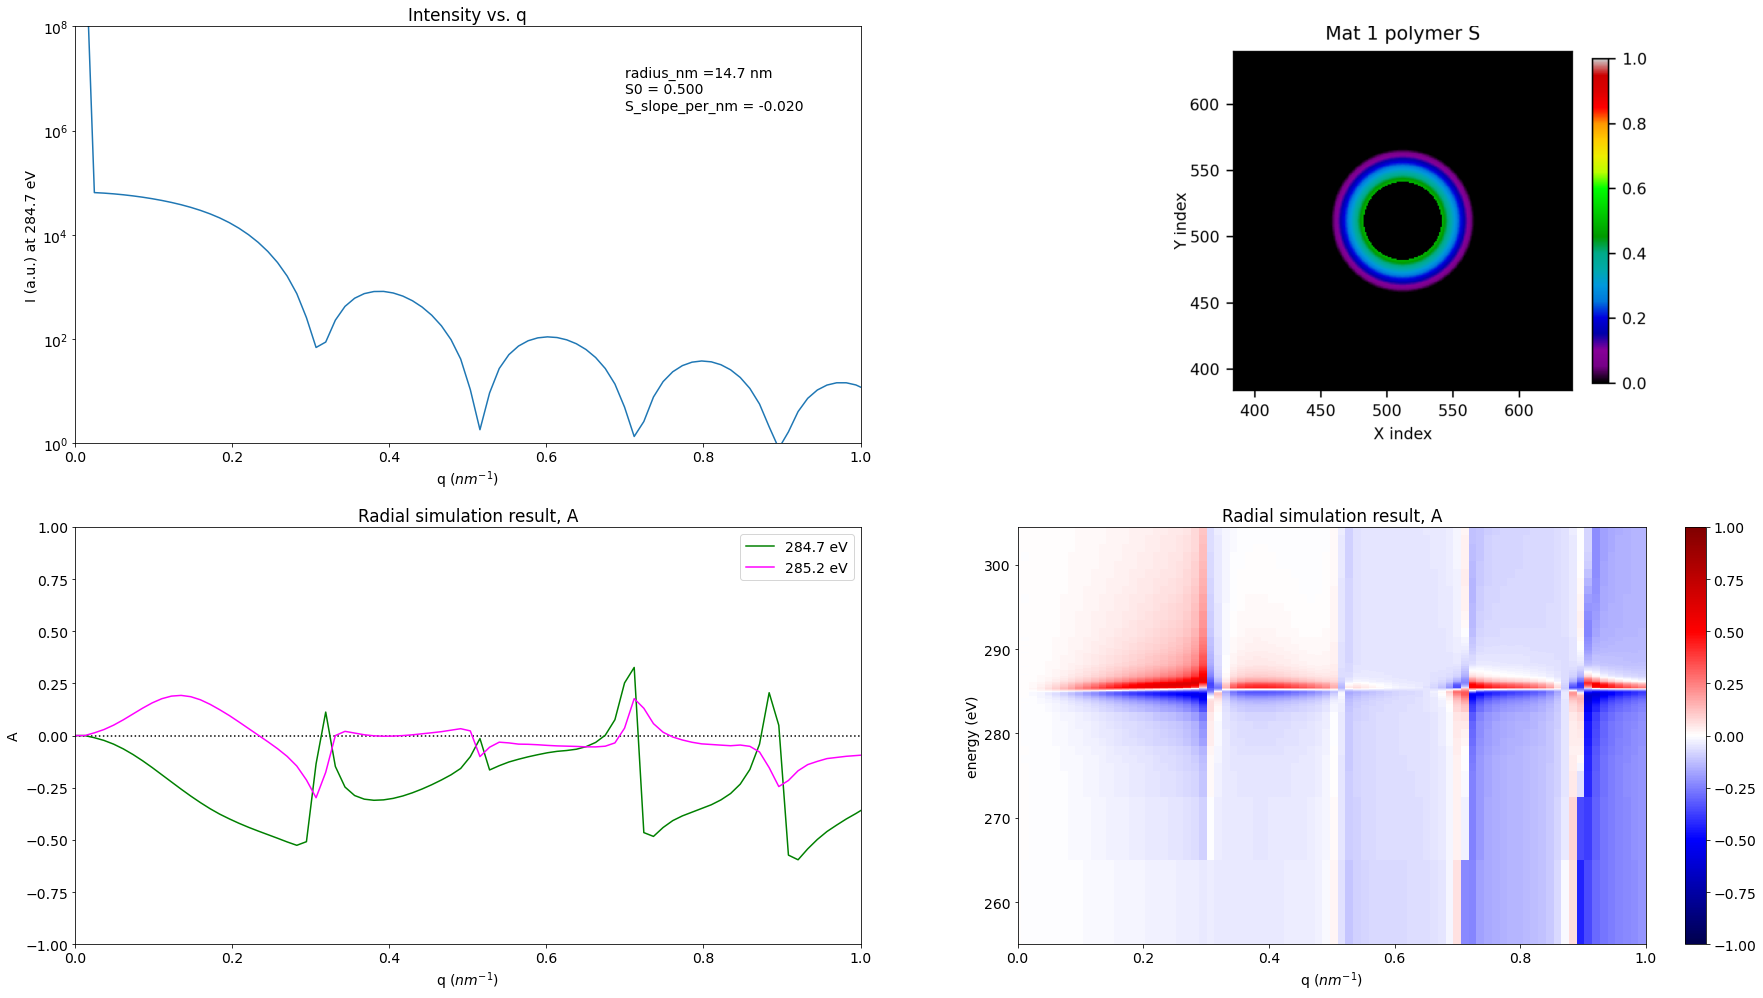

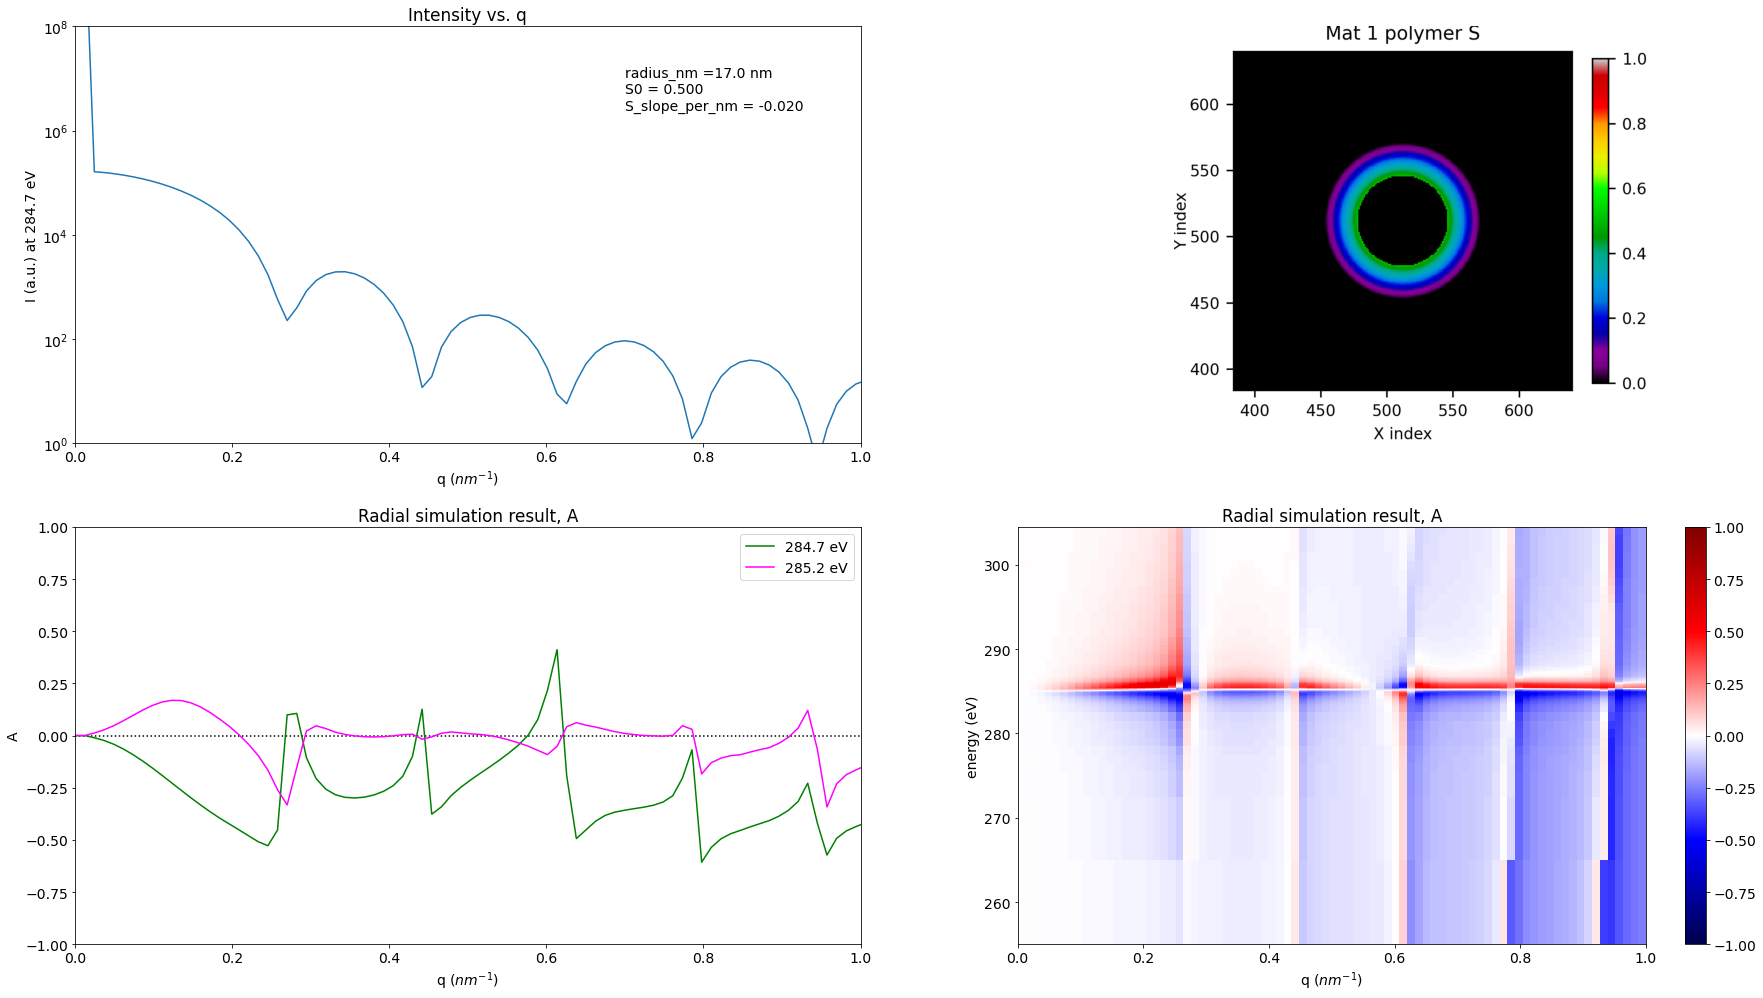

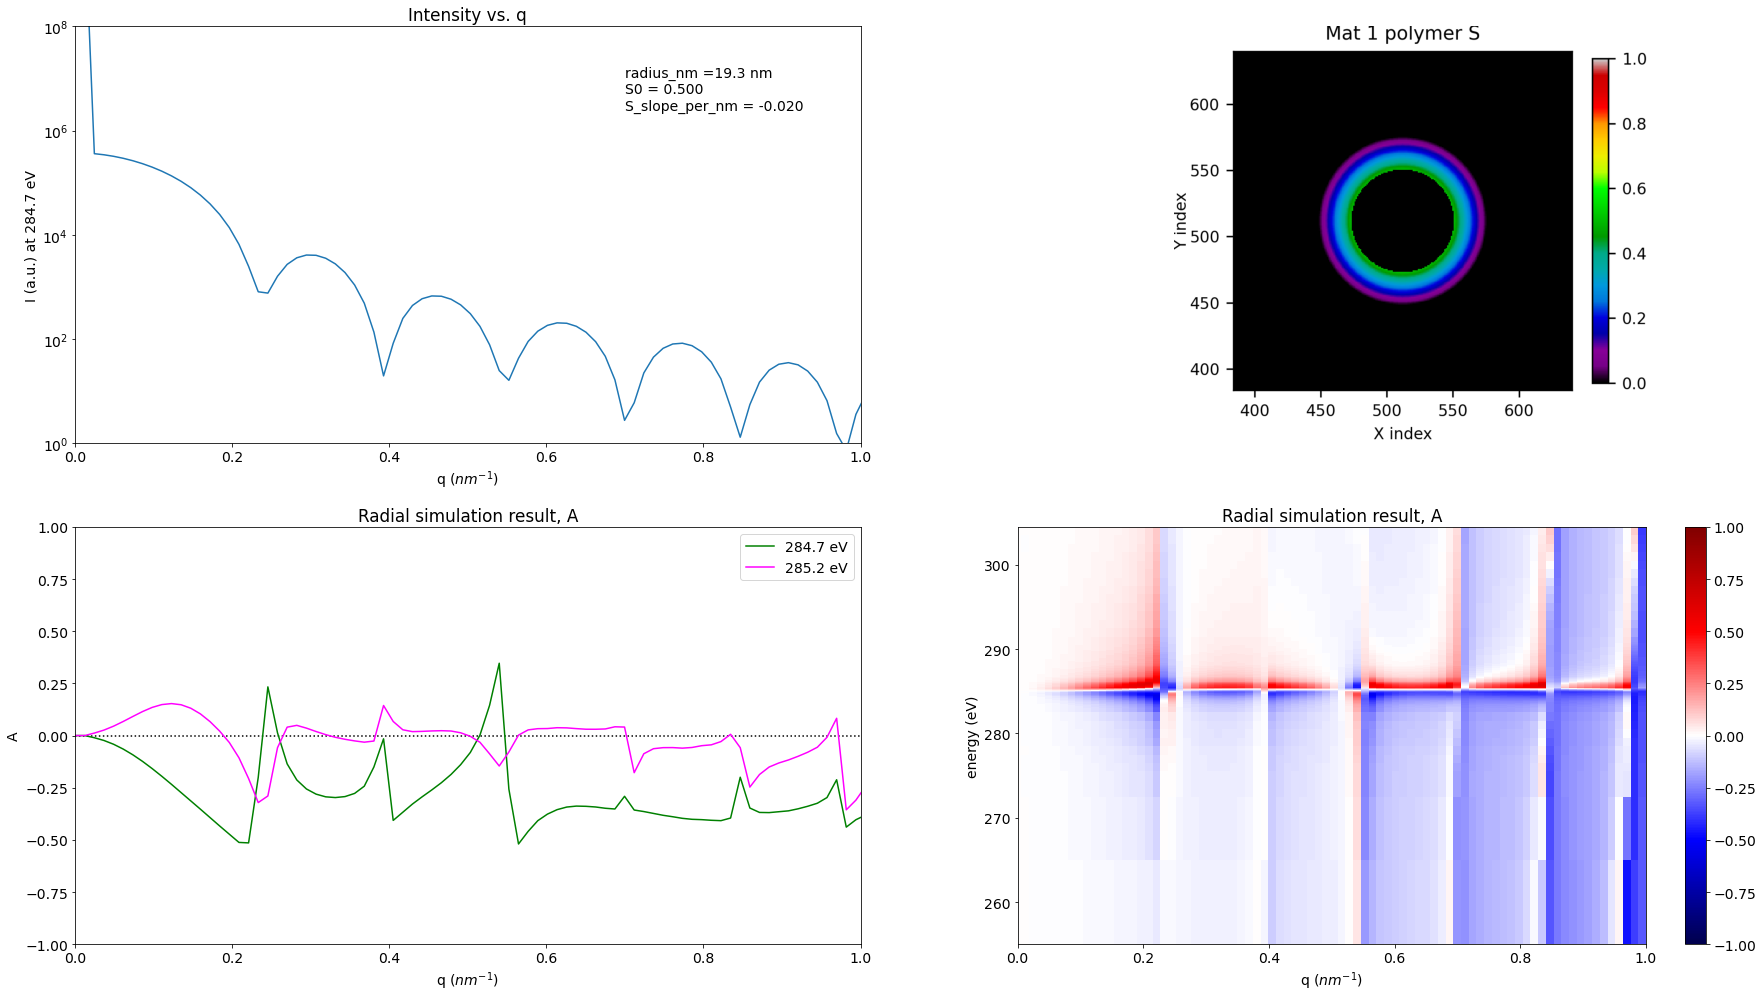

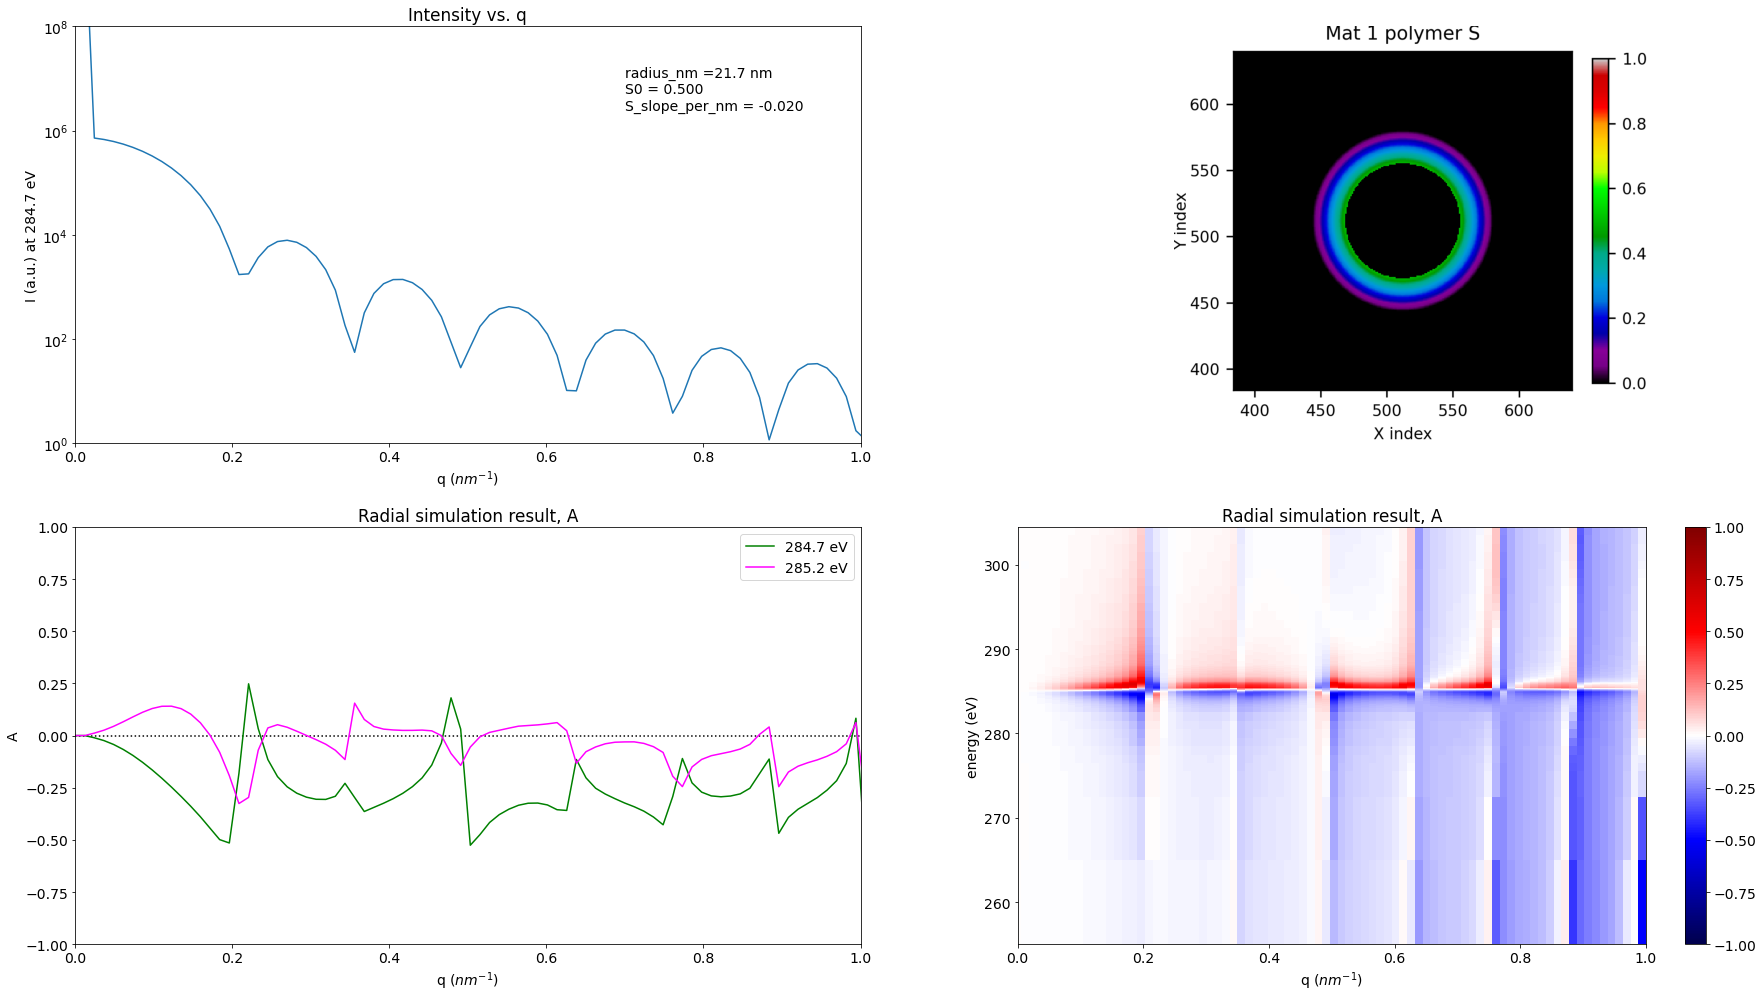

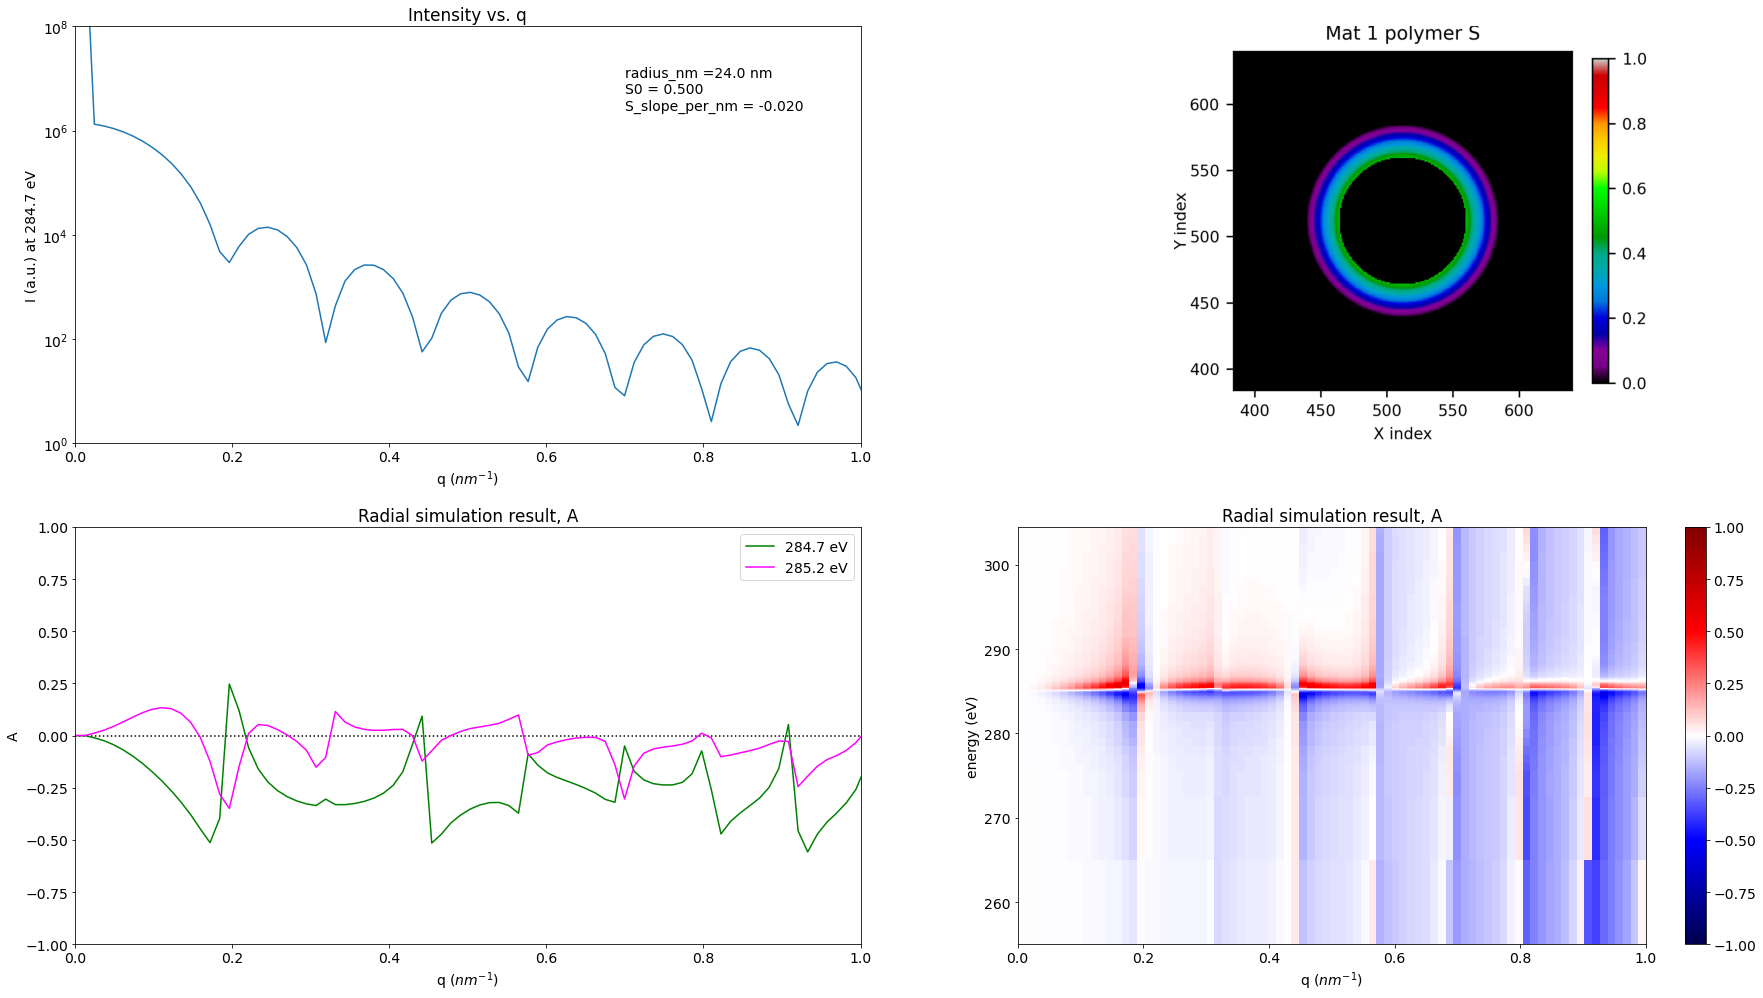

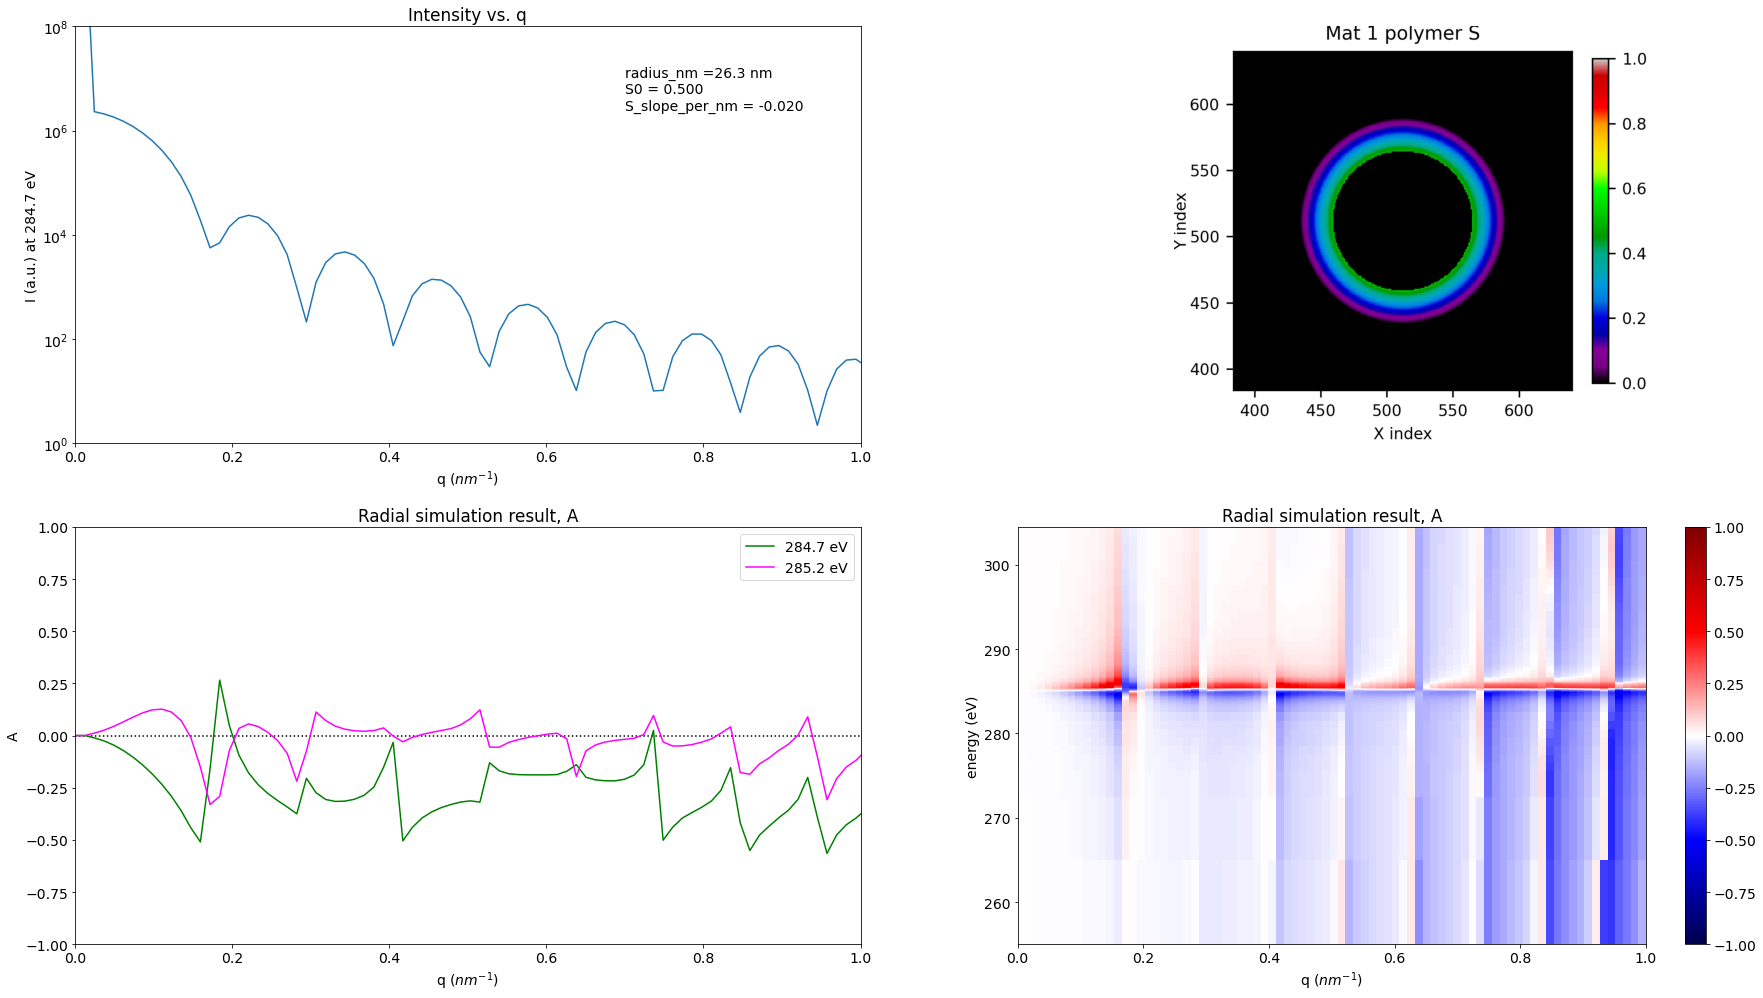

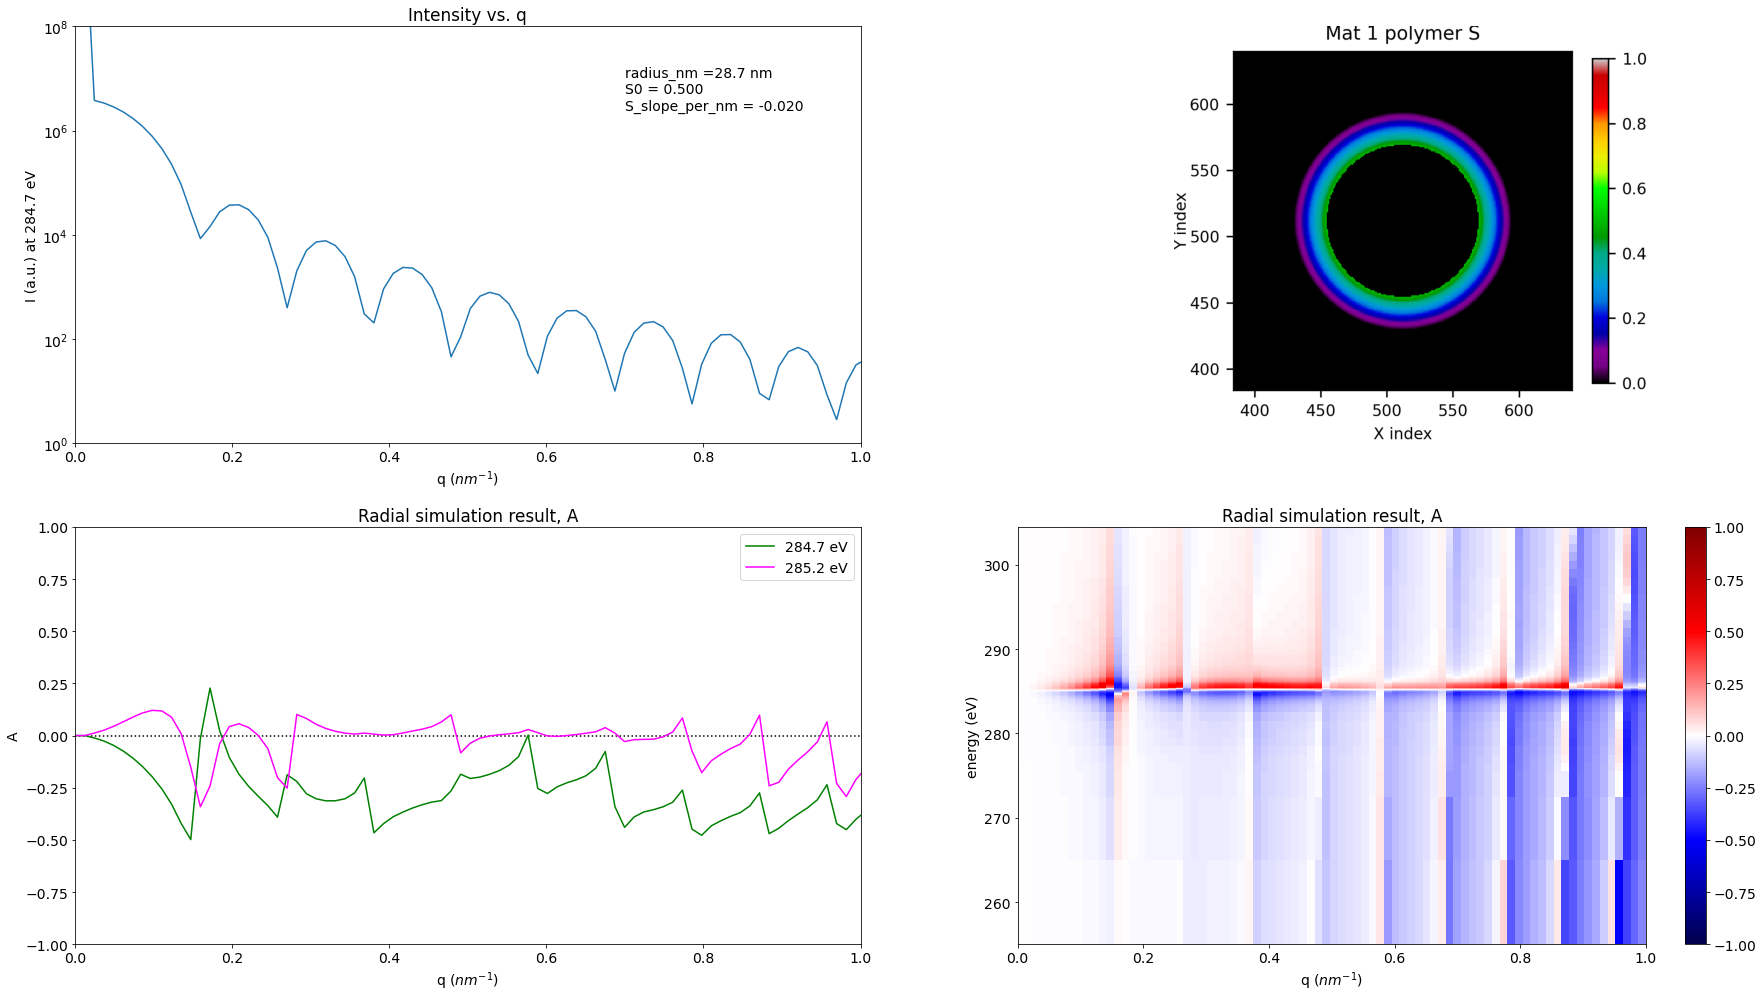

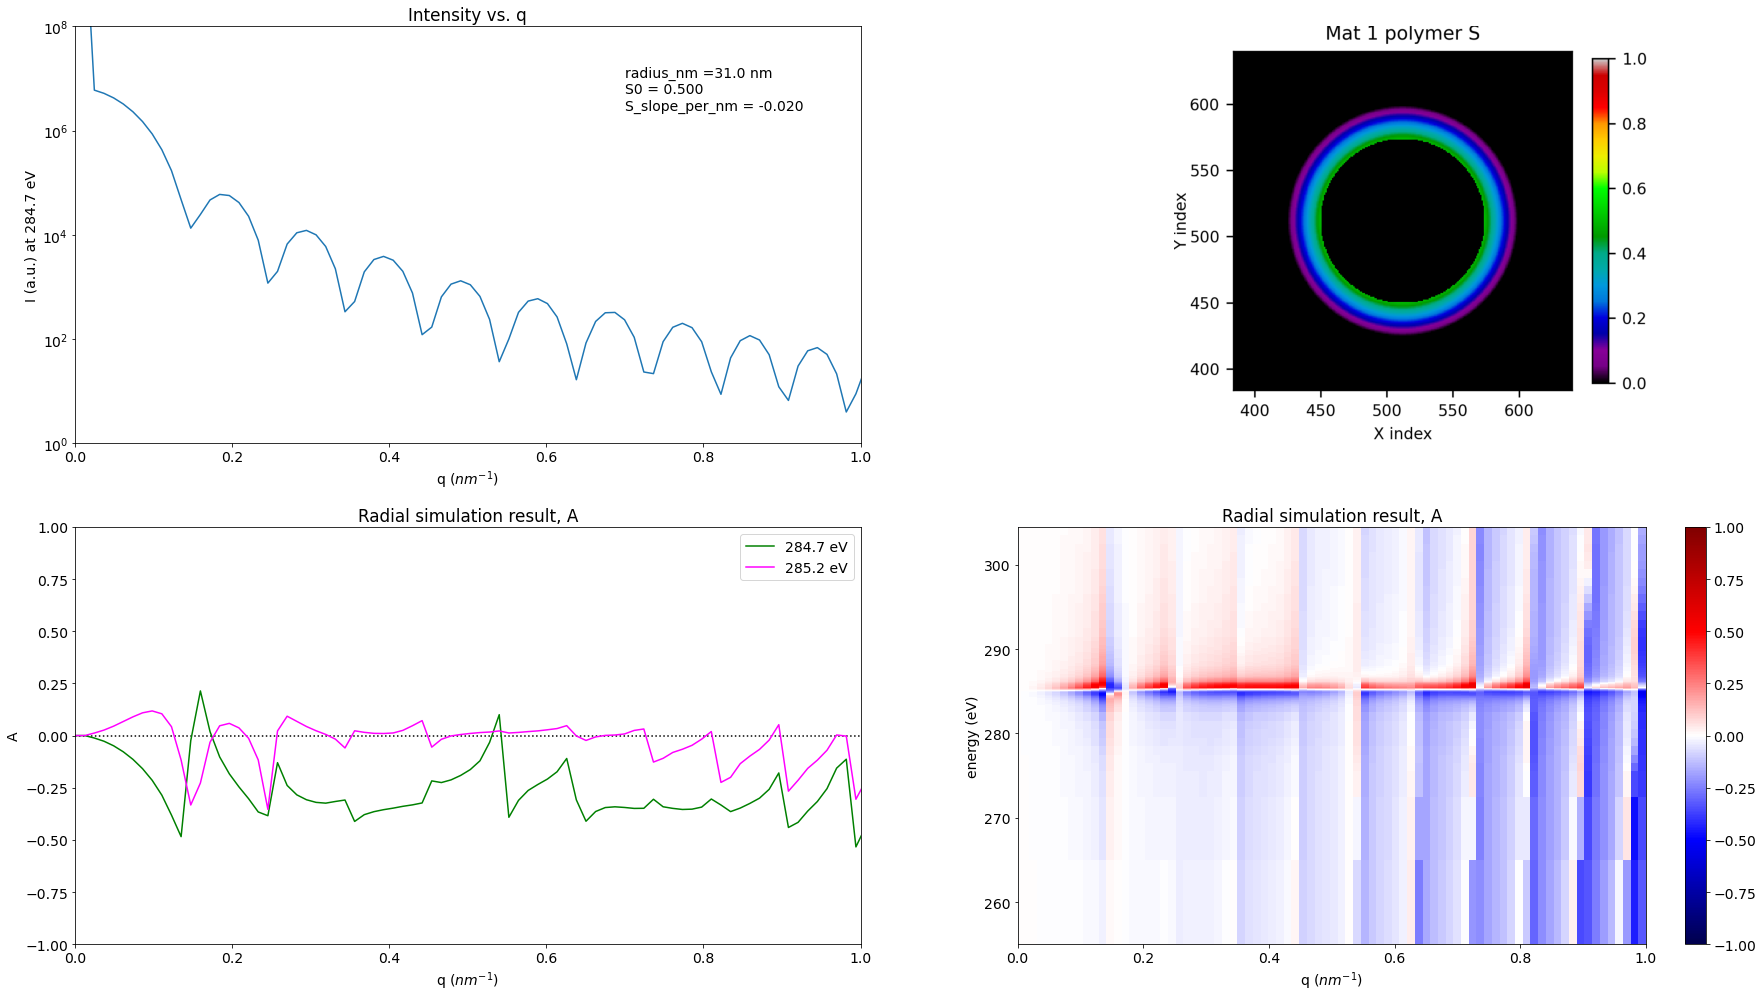

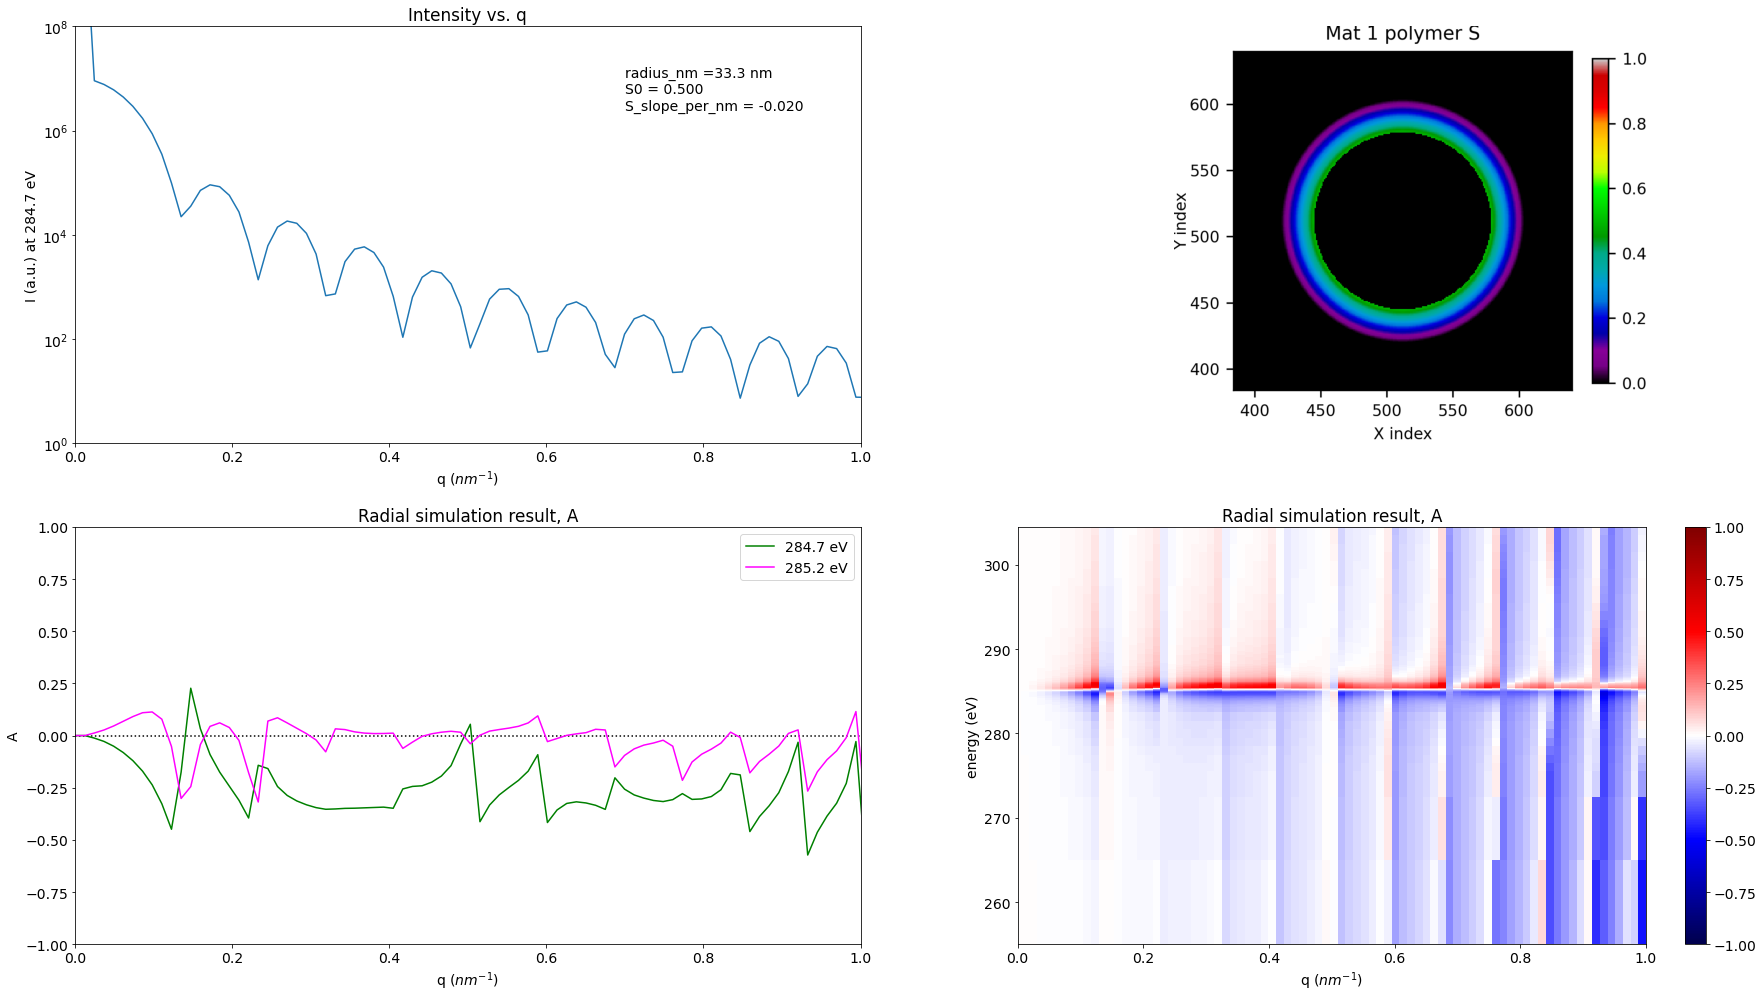

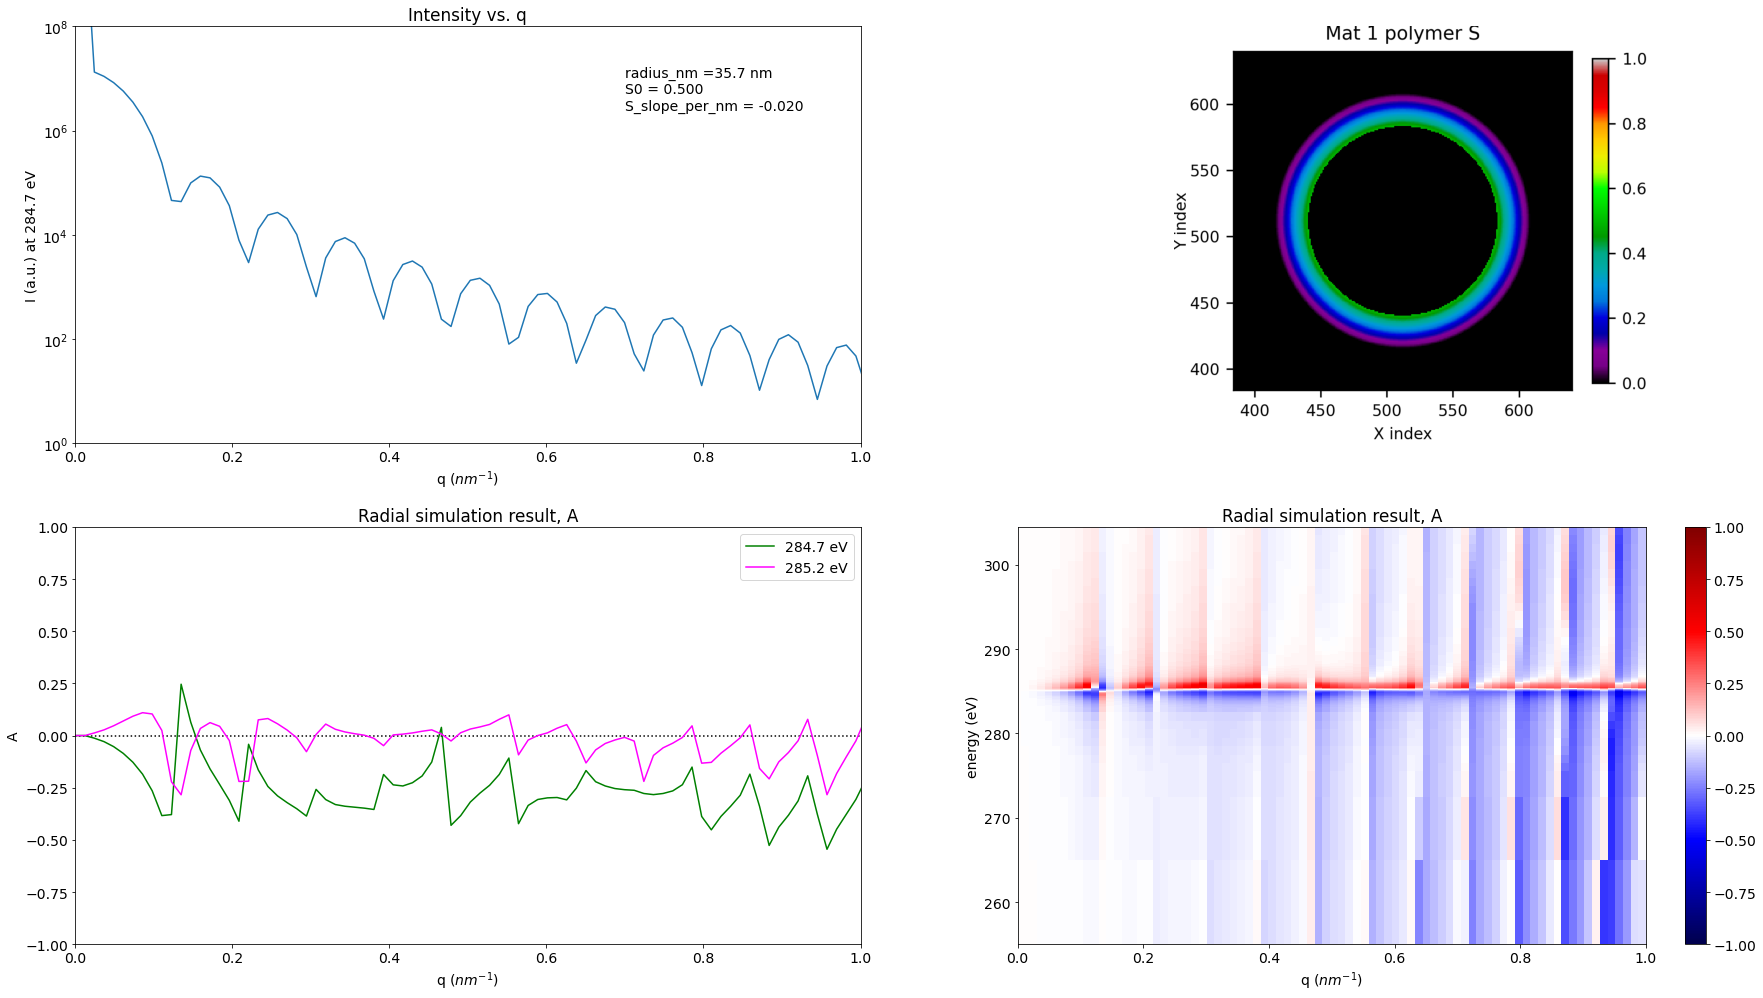

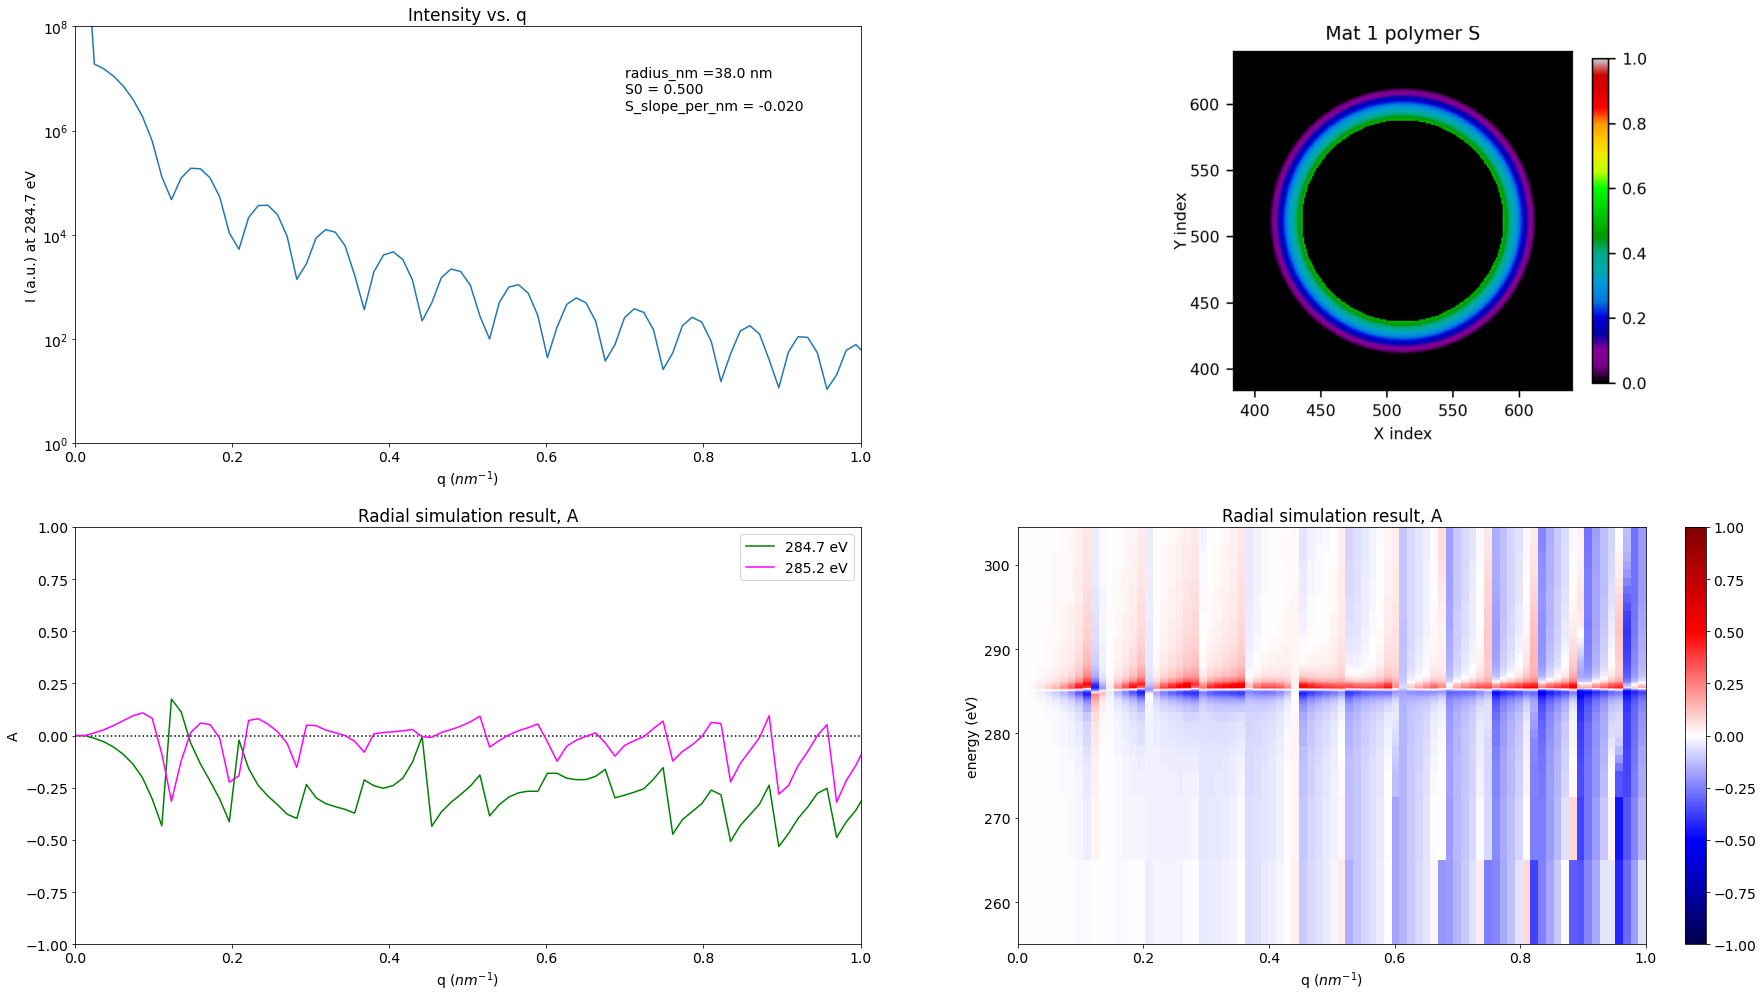

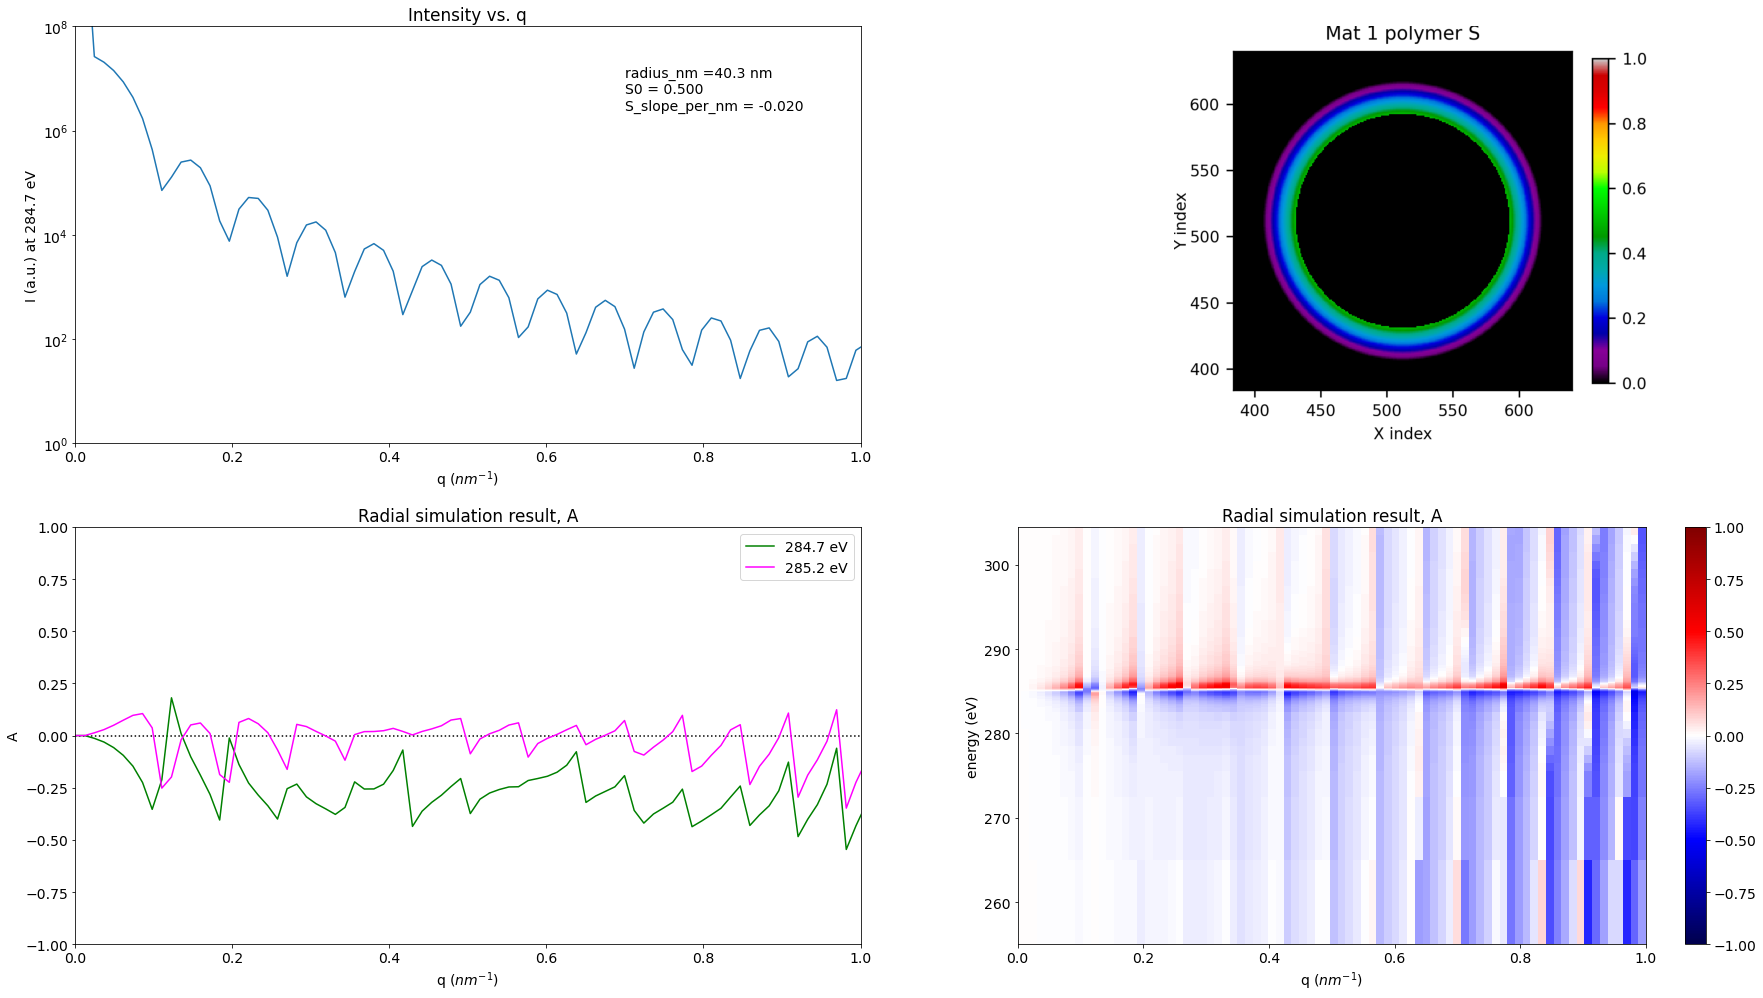

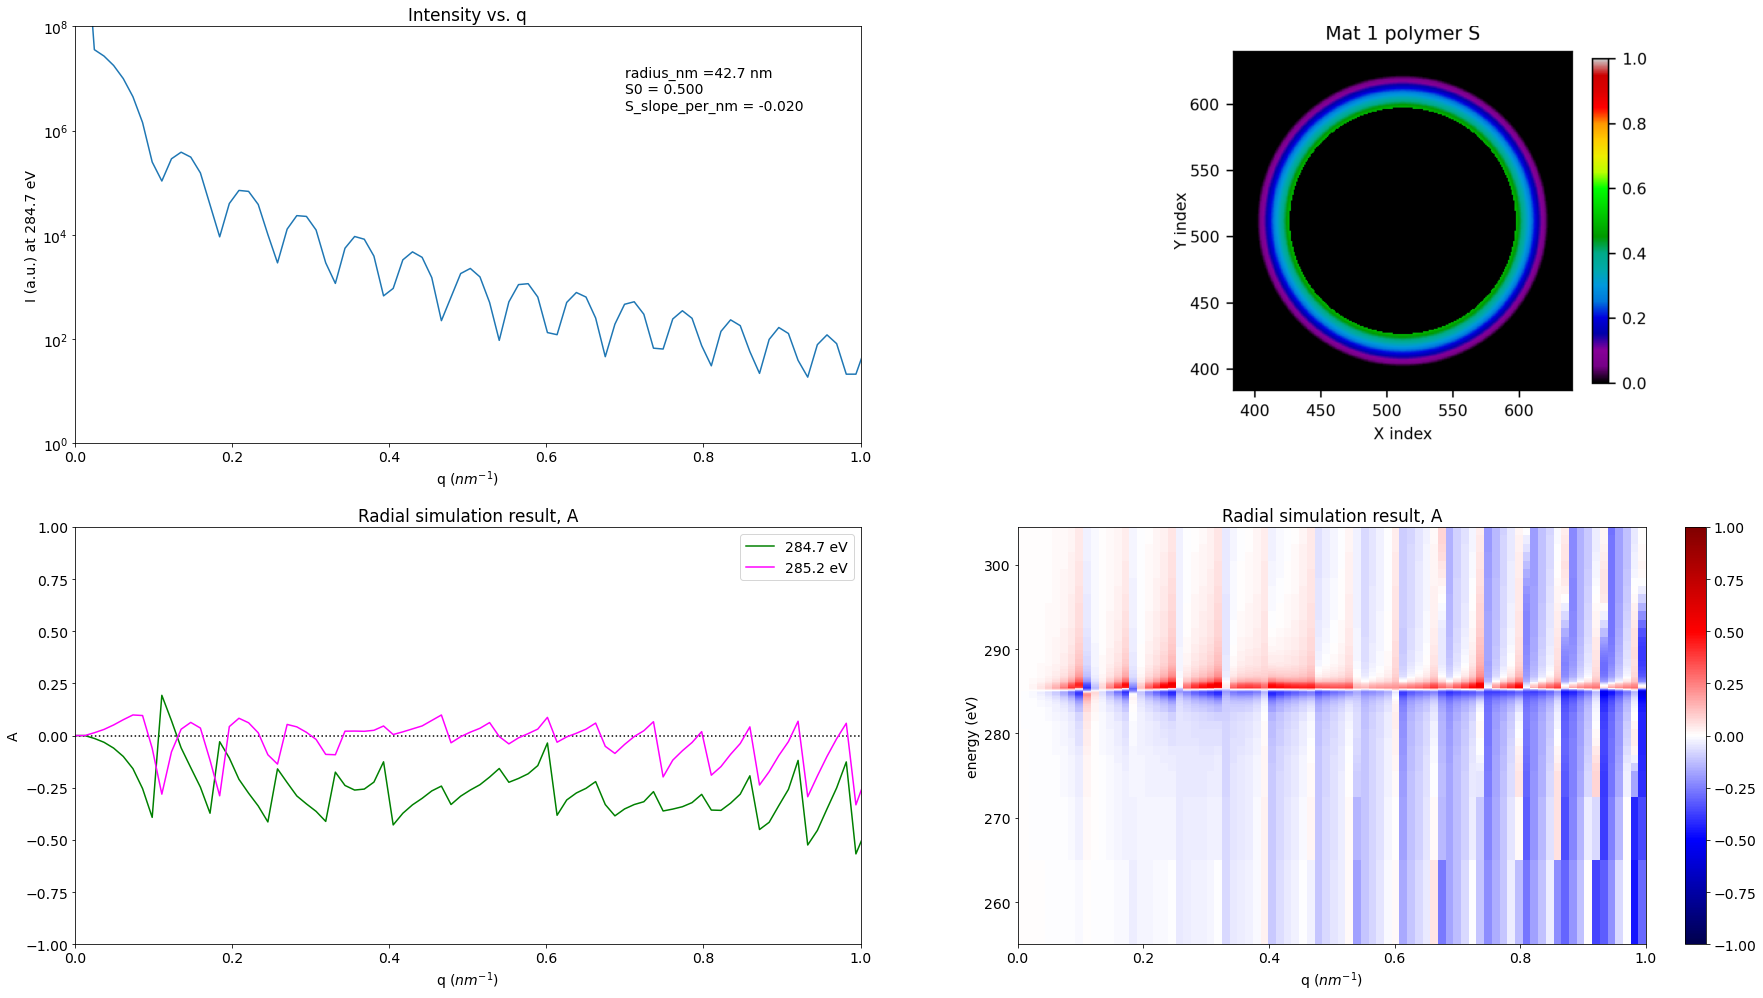

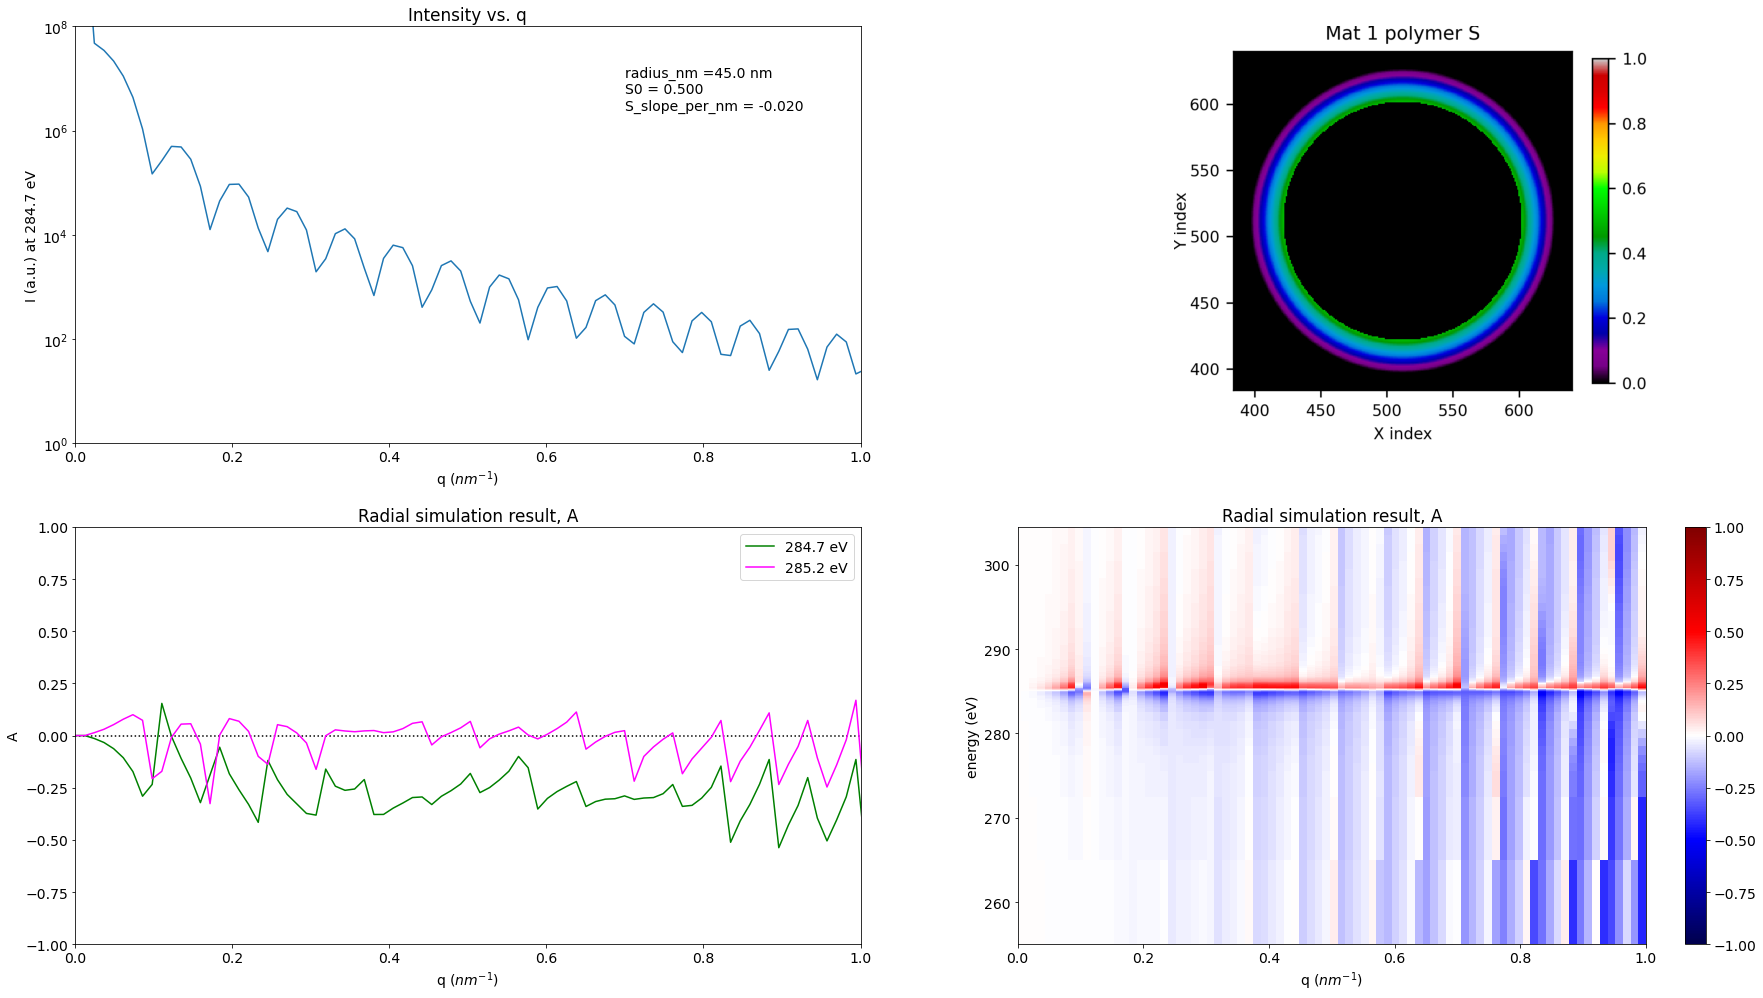

In [26]:
# we will store the rgb_arrays in a list called frames because we want to animate the simulation
frames = []
for result in results:
    frames.append(plot_result(result))

# note it's not streightforward to suppress the output here so you might want to collapse the outputs

## Animating the visual abstracts

Below is some animation code that is offered without deep explanation. It runs a binary code that needs to be installed on the linux system you are using called "ffmpeg", which is the gold standard for movie encoding. This code will accept our frames list and produce a movie.

In [27]:
import subprocess, shlex

def encode_video_loop(
    frames, output_file, frame_rate=3, still_frames=5, loops=1
):
    """
    Encode a video from a sequence of frames, with a specified number
    of loops and still frames in between each loop.

    Parameters
    ----------
    frames : list of numpy arrays
        Frames to be encoded into the video
    output_file : str
        Path to the output video file
    frame_rate : int, optional
        Frame rate of the output video. Defaults to 3.
    still_frames : int, optional
        Number of still frames to write in between each loop. Defaults to 5.
    loops : int, optional
        Number of loops to write. Defaults to 1.
    """
    width, height = frames[0].shape[1], frames[0].shape[0]
    cmd = f'ffmpeg -y -s {width}x{height} -pixel_format rgb24 -f rawvideo -r {frame_rate} -i pipe: -vcodec libx264 -pix_fmt yuv420p -crf 15 {output_file}'
    process = subprocess.Popen(shlex.split(cmd), stdin=subprocess.PIPE, stdout=subprocess.DEVNULL)
    
    for _ in range(loops):
        for frame in frames:
            process.stdin.write(frame.tobytes())
        for _ in range(still_frames):
            process.stdin.write(frames[-1].tobytes())
        for frame in reversed(frames):
            process.stdin.write(frame.tobytes())
        for _ in range(still_frames):
            process.stdin.write(frames[0].tobytes())
    
    process.stdin.close()
    process.wait()
    process.terminate()

In [28]:
encode_video_loop(frames, videoPath / 'tutorial_tanlat_radius_nm.mp4', frame_rate = 5, loops = 1)

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

If you check the videos directory, you can watch the video!